## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Introduction</p>

<a id="0"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

One of the most important components to any data science experiment that doesn’t get as much importance as it should is **``Exploratory Data Analysis (EDA)``**. In short, EDA is **``"A first look at the data"``**. It is a critical step in analyzing the data from an experiment. It is used to understand and summarize the content of the dataset to ensure that the features which we feed to our machine learning algorithms are refined and we get valid, correctly interpreted results.
In general, looking at a column of numbers or a whole spreadsheet and determining the important characteristics of the data can be very tedious and boring. Moreover, it is good practice to understand the problem statement and the data before you get your hands dirty, which in view, helps to gain a lot of insights. I will try to explain the concept using the Adult dataset/Census Income dataset available on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Adult). The problem statement here is to predict whether the income exceeds 50k a year or not based on the census data.

# Aim of the Project

Applying Exploratory Data Analysis (EDA) and preparing the data to implement the Machine Learning Algorithms;
1. Analyzing the characteristics of individuals according to income groups
2. Preparing data to create a model that will predict the income levels of people according to their characteristics (So the "salary" feature is the target feature)

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Dataset Info</p>

<a id="1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

The Census Income dataset has 48,842 entries. Each entry contains the following information about an individual:

- **salary (target feature/label):** whether or not an individual makes more than $50,000 annually. (<= 50K, >50K)
- **age:** the age of an individual. (Integer greater than 0)
- **workclass:** a general term to represent the employment status of an individual. (Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked)
- **fnlwgt:** this is the number of people the census believes the entry represents. People with similar demographic characteristics should have similar weights.  There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.(Integer greater than 0)
- **education:** the highest level of education achieved by an individual. (Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.)
- **education-num:** the highest level of education achieved in numerical form. (Integer greater than 0)
- **marital-status:** marital status of an individual. Married-civ-spouse corresponds to a civilian spouse while Married-AF-spouse is a spouse in the Armed Forces. Married-spouse-absent includes married people living apart because either the husband or wife was employed and living at a considerable distance from home (Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse)
- **occupation:** the general type of occupation of an individual. (Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces)
- **relationship:** represents what this individual is relative to others. For example an individual could be a Husband. Each entry only has one relationship attribute. (Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried)
- **race:** Descriptions of an individual’s race. (White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black)
- **sex:** the biological sex of the individual. (Male, female)
- **capital-gain:** capital gains for an individual. (Integer greater than or equal to 0)
- **capital-loss:** capital loss for an individual. (Integer greater than or equal to 0)
- **hours-per-week:** the hours an individual has reported to work per week. (continuous)
- **native-country:** country of origin for an individual (United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands)

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Importing Related Libraries</p>

<a id="2"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

Once you've installed NumPy & Pandas you can import them as a library:

In [302]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:left; border-radius:10px 10px;">Reading the data from file</p>

In [303]:
df_orginal = pd.read_csv("adult_eda.csv")
df = df_orginal.copy()
df.head()

age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors          13.00   
1   50  Self-emp-not-inc   83311  Bachelors          13.00   
2   38           Private  215646    HS-grad           9.00   
3   53           Private  234721       11th           7.00   
4   28           Private  338409  Bachelors          13.00   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country salary  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Recognizing and Understanding Data</p>

<a id="3"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

### 1.Try to understand what the data looks like
- Check the head, shape, data-types of the features.
- Check if there are some dublicate rows or not. If there are, then drop them. 
- Check the statistical values of features.
- If needed, rename the columns' names for easy use. 
- Basically check the missing values.

In [304]:
df.head()

age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors          13.00   
1   50  Self-emp-not-inc   83311  Bachelors          13.00   
2   38           Private  215646    HS-grad           9.00   
3   53           Private  234721       11th           7.00   
4   28           Private  338409  Bachelors          13.00   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country salary  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

In [305]:
df.shape

(32561, 15)

In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  int64  
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  int64  
 3   education       32561 non-null  object 
 4   education-num   31759 non-null  float64
 5   marital-status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    27493 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital-gain    32561 non-null  int64  
 11  capital-loss    32561 non-null  int64  
 12  hours-per-week  32561 non-null  int64  
 13  native-country  32561 non-null  object 
 14  salary          32561 non-null  object 
dtypes: float64(1), int64(5), object(9)
memory usage: 3.7+ MB


# DROPPING DUPLICATES

In [307]:
df.duplicated().value_counts()

False    32537
True        24
dtype: int64

In [308]:
df[df.duplicated()].sample(5)

age workclass  fnlwgt     education  education-num      marital-status  \
21318   19   Private  138153  Some-college          10.00       Never-married   
18555   30   Private  144593       HS-grad           9.00       Never-married   
28522   42   Private  204235  Some-college          10.00  Married-civ-spouse   
28230   27   Private  255582       HS-grad           9.00       Never-married   
18698   19   Private   97261       HS-grad           9.00       Never-married   

              occupation   relationship   race     sex  capital-gain  \
21318       Adm-clerical            NaN  White  Female             0   
18555      Other-service  Not-in-family  Black    Male             0   
28522     Prof-specialty        Husband  White    Male             0   
28230  Machine-op-inspct  Not-in-family  White  Female             0   
18698    Farming-fishing  Not-in-family  White    Male             0   

       capital-loss  hours-per-week native-country salary  
21318             0              10  United-States  <=50K  
18555             0              40              ?  <=50K  
28522             0              40  United-States   >50K  
28230             0              40  United-States  <=50K  
18698             0              40  United-States  <=50K

In [309]:
drop_index = df[df.duplicated()].index
df.drop(drop_index, inplace=True)
df.shape

(32537, 15)

# OVERVIEW

In [310]:
df.describe(include="O").T

count unique                 top   freq
workclass       32537      9             Private  22673
education       32537     16             HS-grad  10494
marital-status  32537      7  Married-civ-spouse  14970
occupation      32537     15      Prof-specialty   4136
relationship    27473      5             Husband  13187
race            32537      5               White  27795
sex             32537      2                Male  21775
native-country  32537     42       United-States  29153
salary          32537      2               <=50K  24698

In [311]:
df.describe().T

count      mean       std      min       25%       50%  \
age            32537.00     38.59     13.64    17.00     28.00     37.00   
fnlwgt         32537.00 189780.85 105556.47 12285.00 117827.00 178356.00   
education-num  31735.00     10.08      2.58     1.00      9.00     10.00   
capital-gain   32537.00   1078.44   7387.96     0.00      0.00      0.00   
capital-loss   32537.00     87.37    403.10     0.00      0.00      0.00   
hours-per-week 32537.00     40.44     12.35     1.00     40.00     40.00   

                     75%        max  
age                48.00      90.00  
fnlwgt         236993.00 1484705.00  
education-num      12.00      16.00  
capital-gain        0.00   99999.00  
capital-loss        0.00    4356.00  
hours-per-week     45.00      99.00

In [312]:
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
              'marital_status', 'occupation', 'relationship', 'race', 'sex',
              'Cgain', 'Closs', 'working_hours', 'country', 'salary']

In [313]:
df.head(1)

age  workclass  fnlwgt  education  education_num marital_status  \
0   39  State-gov   77516  Bachelors          13.00  Never-married   

     occupation   relationship   race   sex  Cgain  Closs  working_hours  \
0  Adm-clerical  Not-in-family  White  Male   2174      0             40   

         country salary  
0  United-States  <=50K

In [314]:
for i in df.columns:
    print("/////"*20)
    print("Column Name : ",i)
    print("---"*10)
    print(df[i].value_counts(dropna=False))


////////////////////////////////////////////////////////////////////////////////////////////////////
Column Name :  age
------------------------------
36    898
31    888
34    886
23    876
33    875
     ... 
83      6
88      3
85      3
86      1
87      1
Name: age, Length: 73, dtype: int64
////////////////////////////////////////////////////////////////////////////////////////////////////
Column Name :  workclass
------------------------------
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
////////////////////////////////////////////////////////////////////////////////////////////////////
Column Name :  fnlwgt
------------------------------
164190    13
123011    13
203488    13
148995    12
113364    12
          ..
138342     1
158040     1
232784     1
325573     

# MISSING VALUES

In [315]:
df.isnull().sum()

age                  0
workclass            0
fnlwgt               0
education            0
education_num      802
marital_status       0
occupation           0
relationship      5064
race                 0
sex                  0
Cgain                0
Closs                0
working_hours        0
country              0
salary               0
dtype: int64

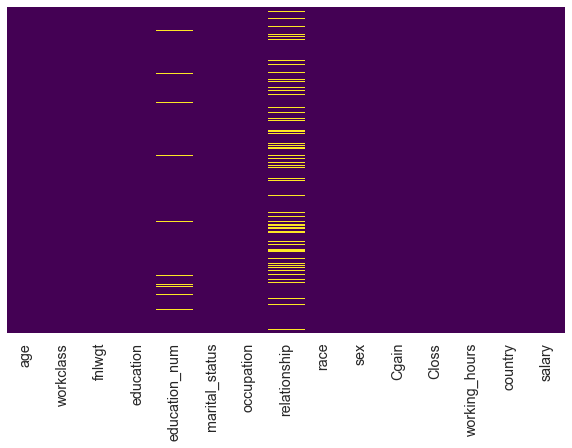

In [316]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis');

In [317]:
df.groupby("education")["education_num"].value_counts(dropna=False)

education     education_num
10th          6.00               916
              NaN                 17
11th          7.00              1146
              NaN                 29
12th          8.00               424
              NaN                  9
1st-4th       2.00               159
              NaN                  7
5th-6th       3.00               329
              NaN                  3
7th-8th       4.00               630
              NaN                 15
9th           5.00               503
              NaN                 11
Assoc-acdm    12.00             1044
              NaN                 23
Assoc-voc     11.00             1343
              NaN                 39
Bachelors     13.00             5245
              NaN                108
Doctorate     16.00              405
              NaN                  8
HS-grad       9.00             10208
              NaN                286
Masters       14.00             1686
              NaN                 36
Preschool 

In [318]:
df[df == "?"].any()

age               False
workclass          True
fnlwgt            False
education         False
education_num     False
marital_status    False
occupation         True
relationship      False
race              False
sex               False
Cgain             False
Closs             False
working_hours     False
country            True
salary            False
dtype: bool

In [319]:
df[df == "?"].count()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
Cgain                0
Closs                0
working_hours        0
country            582
salary               0
dtype: int64

In [320]:
df[df["country"] =="?"].sample(5)

age     workclass  fnlwgt  education  education_num  \
25549   67     State-gov  239705  Doctorate          16.00   
12973   26       Private  153078    HS-grad           9.00   
32469   58  Self-emp-inc  181974  Doctorate          16.00   
26569   27       Private  333296  Bachelors          13.00   
22540   43       Private  244172    HS-grad           9.00   

           marital_status         occupation   relationship  \
25549  Married-civ-spouse     Prof-specialty        Husband   
12973       Never-married       Adm-clerical            NaN   
32469       Never-married     Prof-specialty  Not-in-family   
26569       Never-married      Other-service  Not-in-family   
22540  Married-civ-spouse  Machine-op-inspct        Husband   

                     race     sex  Cgain  Closs  working_hours country salary  
25549               Black    Male      0      0             12       ?  <=50K  
12973  Asian-Pac-Islander    Male      0      0             80       ?   >50K  
32469               White  Female      0      0             99       ?  <=50K  
26569               White    Male      0      0             30       ?  <=50K  
22540               White    Male      0      0             35       ?  <=50K

In [321]:
df[df["workclass"] =="?"].sample(5)

age workclass  fnlwgt     education  education_num      marital_status  \
17644   61         ?  139391  Some-college          10.00  Married-civ-spouse   
20782   30         ?  108464  Some-college          10.00  Married-civ-spouse   
21289   57         ?  155259  Some-college          10.00            Divorced   
3119    35         ?  169809     Bachelors          13.00  Married-civ-spouse   
23853   63         ?  221592       HS-grad           9.00  Married-civ-spouse   

      occupation   relationship   race     sex  Cgain  Closs  working_hours  \
17644          ?        Husband  White    Male  99999      0             30   
20782          ?        Husband  White    Male      0      0             40   
21289          ?  Not-in-family  White  Female      0      0             40   
3119           ?        Husband  White    Male      0      0             20   
23853          ?        Husband  White    Male      0      0             40   

             country salary  
17644  United-States   >50K  
20782  United-States  <=50K  
21289  United-States  <=50K  
3119   United-States  <=50K  
23853  United-States   >50K

In [322]:
df[df["occupation"] =="?"].sample(5)

age workclass  fnlwgt     education  education_num      marital_status  \
15778   27         ?  182386          11th           7.00            Divorced   
13504   51         ?  157327       5th-6th           3.00  Married-civ-spouse   
18923   48         ?  151584  Some-college          10.00       Never-married   
21648   69         ?  168794       7th-8th           4.00  Married-civ-spouse   
8788    18         ?  276864  Some-college          10.00       Never-married   

      occupation   relationship   race     sex  Cgain  Closs  working_hours  \
15778          ?      Unmarried  White  Female      0      0             35   
13504          ?        Husband  Black    Male      0      0              8   
18923          ?  Not-in-family  White    Male   8614      0             60   
21648          ?        Husband  White    Male      0      0             48   
8788           ?            NaN  White  Female      0   1602             20   

             country salary  
15778  United-States  <=50K  
13504  United-States  <=50K  
18923  United-States   >50K  
21648  United-States  <=50K  
8788   United-States  <=50K

In [323]:
df.groupby("workclass")["occupation"].value_counts(dropna=False)

workclass    occupation       
?            ?                    1836
Federal-gov  Adm-clerical          317
             Exec-managerial       180
             Prof-specialty        175
             Tech-support           68
                                  ... 
Without-pay  Craft-repair            1
             Handlers-cleaners       1
             Machine-op-inspct       1
             Other-service           1
             Transport-moving        1
Name: occupation, Length: 83, dtype: int64

In [324]:
x = len(df[(df["occupation"] =="?") &( df["workclass"] =="?")])
y = len(df[df["occupation"] =="?"])
z = len(df[df["workclass"] =="?"])
print("? as a value in occupation column", y)
print("? as a value in workclass column", z)
print("? as a value in both column", x)

? as a value in occupation column 1843
? as a value in workclass column 1836
? as a value in both column 1836


In [325]:
df[(df["occupation"] =="?") & ~(df["workclass"] =="?")]

age     workclass  fnlwgt     education  education_num  \
5361    18  Never-worked  206359          10th           6.00   
10845   23  Never-worked  188535       7th-8th           4.00   
14772   17  Never-worked  237272          10th           6.00   
20337   18  Never-worked  157131          11th           7.00   
23232   20  Never-worked  462294  Some-college          10.00   
32304   30  Never-worked  176673       HS-grad           9.00   
32314   18  Never-worked  153663  Some-college          10.00   

           marital_status occupation   relationship   race     sex  Cgain  \
5361        Never-married          ?            NaN  White    Male      0   
10845            Divorced          ?  Not-in-family  White    Male      0   
14772       Never-married          ?            NaN  White    Male      0   
20337       Never-married          ?            NaN  White  Female      0   
23232       Never-married          ?            NaN  Black    Male      0   
32304  Married-civ-spouse          ?           Wife  Black  Female      0   
32314       Never-married          ?            NaN  White    Male      0   

       Closs  working_hours        country salary  
5361       0             40  United-States  <=50K  
10845      0             35  United-States  <=50K  
14772      0             30  United-States  <=50K  
20337      0             10  United-States  <=50K  
23232      0             40  United-States  <=50K  
32304      0             40  United-States  <=50K  
32314      0              4  United-States  <=50K

In [326]:
df.loc[df["workclass"] == "Never-worked",["workclass","occupation"]] = "Other"
df.loc[((df["occupation"] =="?") & (df["workclass"] =="?")),["workclass","occupation"]] = "Other"
df.loc[df["country"] =="?","country"] = "Other"
#workclass = never-worked but their working hours > 0, so all of them get "other" values

In [327]:
df[df == "?"].any()

age               False
workclass         False
fnlwgt            False
education         False
education_num     False
marital_status    False
occupation        False
relationship      False
race              False
sex               False
Cgain             False
Closs             False
working_hours     False
country           False
salary            False
dtype: bool

### 2.Look at the value counts of columns that have object datatype and detect strange values apart from the NaN Values

In [328]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32537 non-null  int64  
 1   workclass       32537 non-null  object 
 2   fnlwgt          32537 non-null  int64  
 3   education       32537 non-null  object 
 4   education_num   31735 non-null  float64
 5   marital_status  32537 non-null  object 
 6   occupation      32537 non-null  object 
 7   relationship    27473 non-null  object 
 8   race            32537 non-null  object 
 9   sex             32537 non-null  object 
 10  Cgain           32537 non-null  int64  
 11  Closs           32537 non-null  int64  
 12  working_hours   32537 non-null  int64  
 13  country         32537 non-null  object 
 14  salary          32537 non-null  object 
dtypes: float64(1), int64(5), object(9)
memory usage: 4.0+ MB


In [329]:
df.isnull().sum()

age                  0
workclass            0
fnlwgt               0
education            0
education_num      802
marital_status       0
occupation           0
relationship      5064
race                 0
sex                  0
Cgain                0
Closs                0
working_hours        0
country              0
salary               0
dtype: int64

In [330]:
df.groupby("education_num")["education"].value_counts(dropna=False)

education_num  education   
1.00           Preschool          49
2.00           1st-4th           159
3.00           5th-6th           329
4.00           7th-8th           630
5.00           9th               503
6.00           10th              916
7.00           11th             1146
8.00           12th              424
9.00           HS-grad         10208
10.00          Some-college     7089
11.00          Assoc-voc        1343
12.00          Assoc-acdm       1044
13.00          Bachelors        5245
14.00          Masters          1686
15.00          Prof-school       559
16.00          Doctorate         405
Name: education, dtype: int64

In [331]:
df["education_num"] = df.groupby("education")["education_num"].transform(lambda x: x.mode()[0])
df.isnull().sum()

age                  0
workclass            0
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation           0
relationship      5064
race                 0
sex                  0
Cgain                0
Closs                0
working_hours        0
country              0
salary               0
dtype: int64

In [332]:
df[df["relationship"].isnull()].sample(5)

age  workclass  fnlwgt     education  education_num marital_status  \
19818   20    Private  183594  Some-college          10.00  Never-married   
19305   37  Local-gov  239161  Some-college          10.00      Separated   
20594   18    Private  216730          11th           7.00  Never-married   
23292   19    Private  219189          12th           8.00  Never-married   
9694    27    Private  156266       HS-grad           9.00  Never-married   

              occupation relationship                race   sex  Cgain  Closs  \
19818  Handlers-cleaners          NaN               White  Male      0      0   
19305    Protective-serv          NaN               Other  Male      0      0   
20594      Other-service          NaN               White  Male      0      0   
23292      Other-service          NaN               White  Male      0      0   
9694               Sales          NaN  Amer-Indian-Eskimo  Male      0      0   

       working_hours        country salary  
19818             50  United-States  <=50K  
19305             52  United-States  <=50K  
20594             12  United-States  <=50K  
23292             25  United-States  <=50K  
9694              20  United-States  <=50K

In [333]:
df.groupby(["marital_status","sex"])["relationship"].value_counts(dropna=False)

marital_status         sex     relationship  
Divorced               Female  Unmarried          1278
                               Not-in-family      1176
                               NaN                 151
                               Other-relative       65
                       Male    Not-in-family      1227
                               Unmarried           322
                               NaN                 177
                               Other-relative       45
Married-AF-spouse      Female  Wife                 12
                               NaN                   1
                               Other-relative        1
                       Male    Husband               9
Married-civ-spouse     Female  Wife               1554
                               Other-relative       53
                               NaN                  44
                               Not-in-family         5
                               Husband               1
                   

In [334]:
df[df["relationship"].isnull()]["marital_status"].value_counts(dropna=False)

Never-married            4481
Divorced                  328
Separated                  99
Married-civ-spouse         95
Married-spouse-absent      45
Widowed                    15
Married-AF-spouse           1
Name: marital_status, dtype: int64

In [335]:
relationship_mode = df.groupby(["marital_status","sex"])["relationship"].transform(lambda x: x.mode()[0])
df["relationship"].fillna(relationship_mode,inplace=True)
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
Cgain             0
Closs             0
working_hours     0
country           0
salary            0
dtype: int64

In [336]:
df.groupby(["marital_status","sex"])["relationship"].value_counts(dropna=False)

marital_status         sex     relationship  
Divorced               Female  Unmarried          1429
                               Not-in-family      1176
                               Other-relative       65
                       Male    Not-in-family      1404
                               Unmarried           322
                               Other-relative       45
Married-AF-spouse      Female  Wife                 13
                               Other-relative        1
                       Male    Husband               9
Married-civ-spouse     Female  Wife               1598
                               Other-relative       53
                               Not-in-family         5
                               Husband               1
                       Male    Husband           13228
                               Other-relative       71
                               Not-in-family        12
                               Wife                  2
Married-spouse-abse

In [337]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
Cgain             0
Closs             0
working_hours     0
country           0
salary            0
dtype: int64

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Univariate & Multivariate Analysis</p>

<a id="4"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

Examine all features (first target feature("salary"), then numeric ones, lastly categoric ones) separetly from different aspects according to target feature.

**to do list for numeric features:**
1. Check the boxplot to see extreme values 
2. Check the histplot/kdeplot to see distribution of feature
3. Check the statistical values
4. Check the boxplot and histplot/kdeplot by "salary" levels
5. Check the statistical values by "salary" levels
6. Write down the conclusions you draw from your analysis

**to do list for categoric features:**
1. Find the features which contains similar values, examine the similarities and analyze them together 
2. Check the count/percentage of person in each categories and visualize it with a suitable plot
3. If need, decrease the number of categories by combining similar categories
4. Check the count of person in each "salary" levels by categories and visualize it with a suitable plot
5. Check the percentage distribution of person in each "salary" levels by categories and visualize it with suitable plot
6. Check the count of person in each categories by "salary" levels and visualize it with a suitable plot
7. Check the percentage distribution of person in each categories by "salary" levels and visualize it with suitable plot
8. Write down the conclusions you draw from your analysis

**Note :** Instruction/direction for each feature is available under the corresponding feature in detail, as well.

In [338]:
df.head()

age         workclass  fnlwgt  education  education_num  \
0   39         State-gov   77516  Bachelors          13.00   
1   50  Self-emp-not-inc   83311  Bachelors          13.00   
2   38           Private  215646    HS-grad           9.00   
3   53           Private  234721       11th           7.00   
4   28           Private  338409  Bachelors          13.00   

       marital_status         occupation   relationship   race     sex  Cgain  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   2174   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male      0   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male      0   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male      0   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female      0   

   Closs  working_hours        country salary  
0      0             40  United-States  <=50K  
1      0             13  United-States  <=50K  
2      0             40  United-States  <=50K  
3      0             40  United-States  <=50K  
4      0             40           Cuba  <=50K

# SALARY 

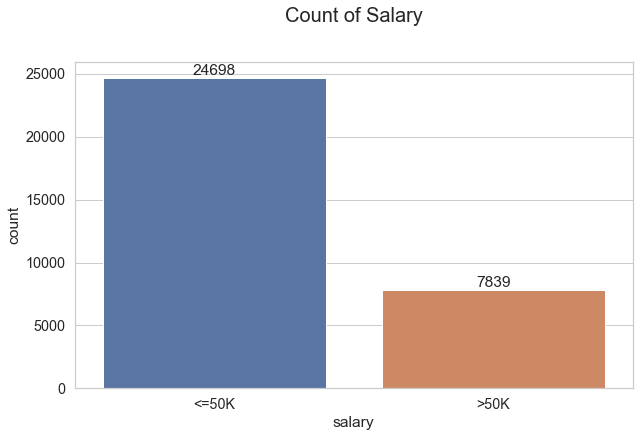

In [339]:
ax = sns.countplot(x = "salary", data=df);
sns.set(font_scale = 1.3)
ax.set_title("Count of Income Levels", size=20, pad=40)
ax.bar_label(ax.containers[0]);

In [340]:
salary_values = df.salary.value_counts(normalize=True)
salary_values

<=50K   0.76
>50K    0.24
Name: salary, dtype: float64

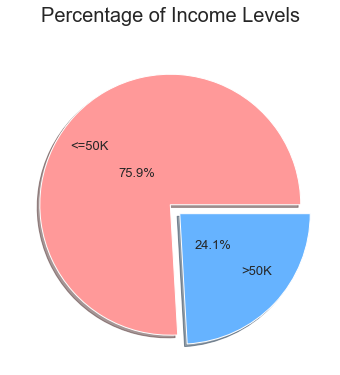

In [341]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
ax = plt.pie( x = salary_values.values, labels=salary_values.index, colors=colors, shadow=True, autopct="%.1f%%",
       explode = [0,0.1], labeldistance=0.65, pctdistance=0.35, textprops={'fontsize': 13});
plt.title("Percentage of Income Levels", size=20, pad=20);

Maaş için izlenim oluşması adına yapılan ilk incelemeler neticesinde;
1. Örneklem içerisinde yer alan verilerin büyük çoğunluğunun, %75.9 oran ile 50 k altında olduğu yorumunda bulunabiliriz.
2. Örneklemin diğer verileri incelendikten sonra verilecek karar daha doğru olacak olup, ülke genelinde daha çok 50k altı maaş alan olduğu yorumunda bulunulabilir.

# AGE

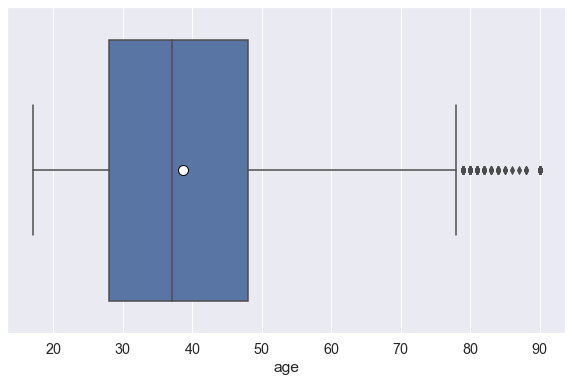

In [342]:
sns.boxplot(x = "age", data=df, showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"});

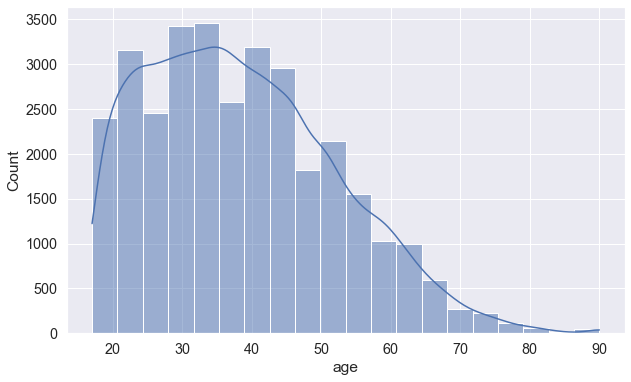

In [343]:
sns.histplot(x="age", data = df, bins=20, kde=True);

In [344]:
df.age.describe()

count   32537.00
mean       38.59
std        13.64
min        17.00
25%        28.00
50%        37.00
75%        48.00
max        90.00
Name: age, dtype: float64

In [345]:
max_iqr = df.age.describe()["75%"] + 1.5*(df.age.describe()["75%"] - df.age.describe()["25%"])
df[df.age > max_iqr].sample(10)

age         workclass  fnlwgt  education  education_num  \
19495   81      Self-emp-inc  247232       10th           6.00   
23459   83      Self-emp-inc  240150       10th           6.00   
20483   79         Local-gov  146244  Doctorate          16.00   
29594   81  Self-emp-not-inc  193237    1st-4th           2.00   
18560   80             Other  172826    HS-grad           9.00   
6173    79           Private  120707  Doctorate          16.00   
20610   90           Private  206667    Masters          14.00   
11731   90             Other   39824    HS-grad           9.00   
11099   79             Other  165209    HS-grad           9.00   
31855   82  Self-emp-not-inc   71438    HS-grad           9.00   

           marital_status       occupation    relationship   race     sex  \
19495  Married-civ-spouse  Exec-managerial            Wife  White  Female   
23459  Married-civ-spouse  Farming-fishing         Husband  White    Male   
20483             Widowed   Prof-specialty       Unmarried  White  Female   
29594             Widowed            Sales  Other-relative  White    Male   
18560  Married-civ-spouse            Other         Husband  White    Male   
6173   Married-civ-spouse   Prof-specialty         Husband  White    Male   
20610  Married-civ-spouse   Prof-specialty            Wife  White  Female   
11731             Widowed            Other   Not-in-family  White    Male   
11099  Married-civ-spouse            Other         Husband  White    Male   
31855  Married-civ-spouse  Farming-fishing         Husband  White    Male   

       Cgain  Closs  working_hours        country salary  
19495   2936      0             28  United-States  <=50K  
23459  20051      0             50  United-States   >50K  
20483      0      0             40  United-States  <=50K  
29594      0      0             45         Mexico  <=50K  
18560      0      0              8  United-States  <=50K  
6173   20051      0             35    El-Salvador   >50K  
20610      0      0             40  United-States   >50K  
11731    401      0              4  United-States  <=50K  
11099      0      0             40  United-States  <=50K  
31855      0      0             20  United-States  <=50K

In [346]:
age_mean = df[df["age"] < 18]["working_hours"].mean()
age_median = df[df["age"] < 18]["working_hours"].median(), 
age_mean , age_median

(21.367088607594937, (20.0,))

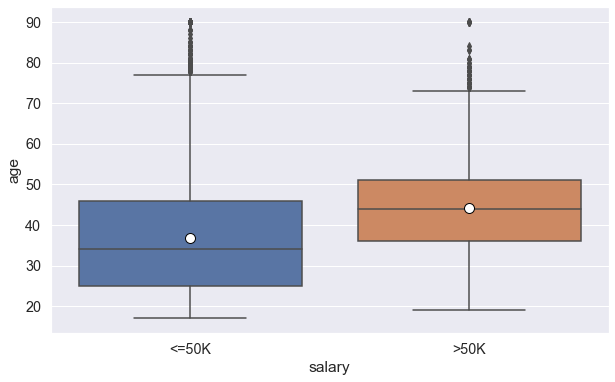

In [347]:
sns.boxplot( x = "salary", y = "age", data=df, showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"});

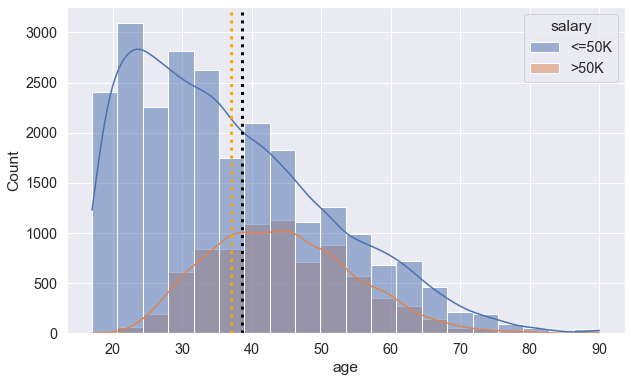

In [348]:
g = sns.histplot(x="age", hue="salary" ,data = df, bins=20, kde=True);
g.axvline(x=df.age.mean(), color='black', linestyle=':', lw=3)
g.axvline(x=np.median(df.age), color='orange', linestyle=':', lw=3);

In [349]:
df.groupby("salary")["age"].describe()

count  mean   std   min   25%   50%   75%   max
salary                                                   
<=50K  24698.00 36.79 14.02 17.00 25.00 34.00 46.00 90.00
>50K    7839.00 44.25 10.52 19.00 36.00 44.00 51.00 90.00

Yaş değişkeni üzerinde yapılan incelemelere göre,
1. Yaş için genel dağılım 30-43 aralığında yoğunlaşmaktadır.
1. 50k altı maaş alanlar daha çok 20-35 yaş grubunda toplanırken, 50k üstü maaş alanlar daha çok 40-50 yaş aralığında toplanmıştır.
2. 50k altı maaş alanlar sola yaslı bir tablo çizerken( yani daha çok küçük yaş gruplarında toplanırken), 50k üstü maaş alanlar normal dağılıma yakın bir tablo ortaya koymaktadırlar.
3. İki grup maaş bilgisi içinde ortalama 75 yaş üstü outlier olarak gözükmekte, fakat hayatın olağan akışı içerisinde bu değerler normal değer olarak kabul edilmektedir. Çok yüksek gözüken bu değerlere bakıldığında, çalışma saatlerinin görece olarak daha az olduğu görülmektedir.
4. 18 yaş altı çalışanlarda büyük kısıtlamalar içeren ABD için; 50k altı maaş alanlarda min yaş 17 iken, 17 yaş için çalışma saati ortalaması 21, ortancası ise 20 saat olup daha çok part-time çalışma yaptıkları yorumunda bulunabiliriz. Outlier'lar ile ilgili yaş değişkeninde  yapılacak herhangi bir işlem yoktur.

# FNLWGT

In [350]:
df.fnlwgt.duplicated().value_counts()

False    21648
True     10889
Name: fnlwgt, dtype: int64

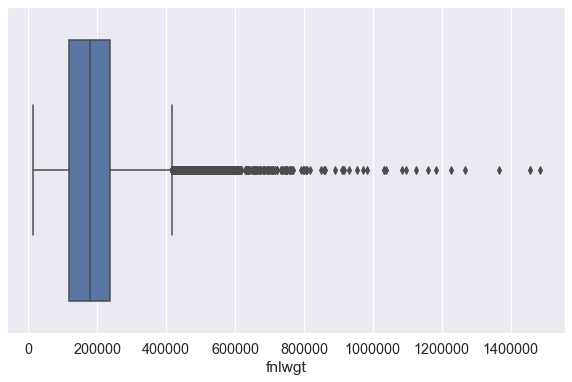

In [351]:
sns.boxplot(x = "fnlwgt", data=df);
plt.ticklabel_format(axis="x", style="plain");

In [352]:
df[df.fnlwgt == df.fnlwgt.min()]

age workclass  fnlwgt     education  education_num marital_status  \
17096   25     Other   12285  Some-college          10.00  Never-married   

      occupation   relationship                race     sex  Cgain  Closs  \
17096      Other  Not-in-family  Amer-Indian-Eskimo  Female      0      0   

       working_hours        country salary  
17096             20  United-States  <=50K

In [353]:
df[df.fnlwgt > 1400000]

age workclass   fnlwgt     education  education_num marital_status  \
14449   25   Private  1484705  Some-college          10.00       Divorced   
18138   39   Private  1455435    Assoc-acdm          12.00      Separated   

            occupation   relationship   race     sex  Cgain  Closs  \
14449  Exec-managerial      Unmarried  White  Female      0      0   
18138     Craft-repair  Not-in-family  White    Male      0      0   

       working_hours        country salary  
14449             25  United-States  <=50K  
18138             40  United-States  <=50K

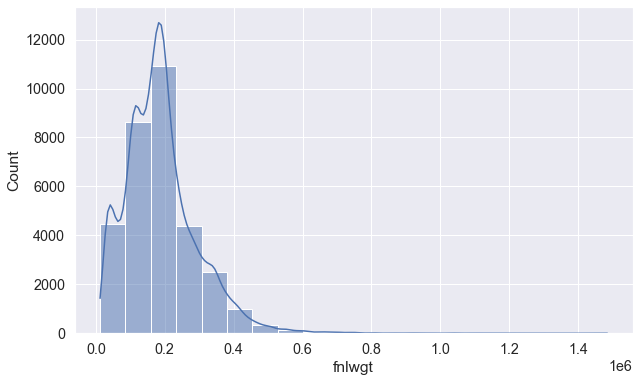

In [354]:
sns.histplot(x="fnlwgt", data = df, bins=20, kde=True);

In [355]:
df.fnlwgt.describe()

count     32537.00
mean     189780.85
std      105556.47
min       12285.00
25%      117827.00
50%      178356.00
75%      236993.00
max     1484705.00
Name: fnlwgt, dtype: float64

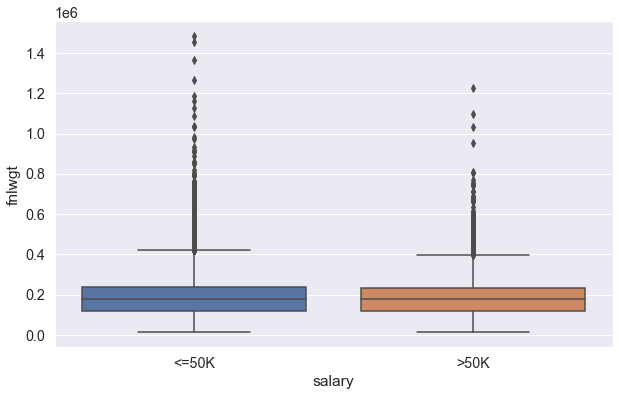

In [356]:
sns.boxplot( x = "salary", y = "fnlwgt", data=df);

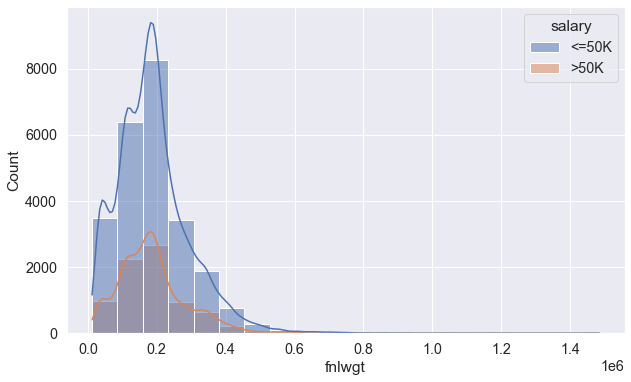

In [357]:
sns.histplot(x="fnlwgt", hue="salary" ,data = df, bins=20, kde=True);

In [358]:
df.groupby("salary")["fnlwgt"].describe()

count      mean       std      min       25%       50%       75%  \
salary                                                                       
<=50K  24698.00 190345.93 106487.41 12285.00 117606.00 179465.00 238968.25   
>50K    7839.00 188000.48 102554.46 14878.00 119100.00 176063.00 230969.00   

              max  
salary             
<=50K  1484705.00  
>50K   1226583.00

In [359]:
fnlwgt_salary = df[~df["fnlwgt"].duplicated()].groupby("salary")["fnlwgt"].sum()
fnlwgt_salary

salary
<=50K    3346005242
>50K      908449473
Name: fnlwgt, dtype: int64

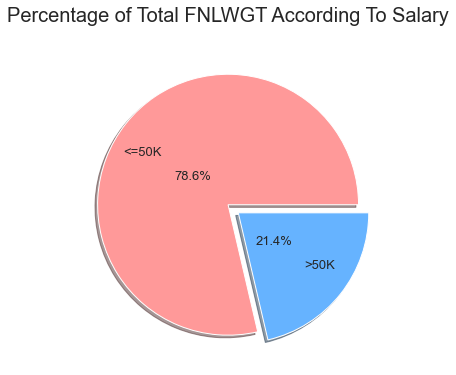

In [360]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
ax = plt.pie( x = fnlwgt_salary.values, labels=fnlwgt_salary.index, colors=colors, shadow=True, autopct="%.1f%%",
       explode = [0,0.1], labeldistance=0.65, pctdistance=0.35, textprops={'fontsize': 13});
plt.title("Percentage of Total FNLWGT According To Salary", size=20, pad=20);

Fnlwgt değişkeni üzerinde yapılan incelemeler neticesinde,
1. Örneklem kapsamında verileri incelenen kişilerin büyük çoğunluğunun (fnlwgt ağırlığı kapsamında) 180k kişilik bir grubu temsil ettiği söyleneblir.
2. İncelenen demografik özellikler kapsamında minimum fnlwgt ağırlığı 12280 iken, maks ağırlıkta outlier değerlerin olduğu görülmektedir. Örneğin 1400000 kişiden fazlasını temsilen aynı demegrafik özelliklere sahip 2 kişinin mevcut olduğunu görüyoruz.
3. Hedef sütunumuz kapsamında yapılan incelemelerde fnlwgt ağırlığının maaş kapsamında çokça bir değişikliğe uğramadığı, toplumda temsil edilen kişi yoğunluğunun 50k üstü ve altı için yine 180000 civarında kaldığı görülmektedir. Median 2 grup içinde 180k civarında mean ise 190k civarındadır.
4. Örneklem içerisindeki fnlwgt değerlerinden tekrar edenler çıkarıldıktan sonra alınan yüzdelerden hareketle Amerikan toplumunun farklı demografik yoğunluklarına göre büyük %78.6 oranla 50k altı maaş ile çalıştığı söylenebilir.

# CAPITAL GAIN 

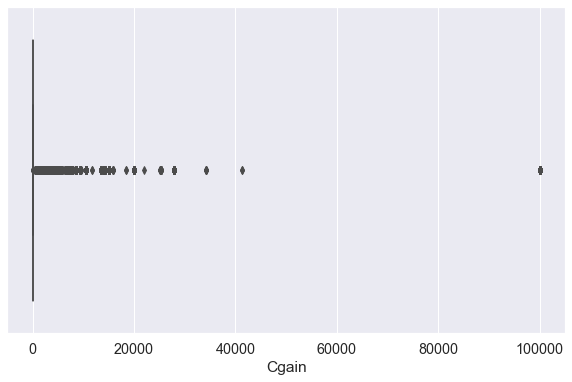

In [361]:
sns.boxplot(x = "Cgain", data=df);

In [362]:
df[df.Cgain > 90000].shape

(159, 15)

In [363]:
df[df.Cgain > 90000].sample(5)

age         workclass  fnlwgt    education  education_num  \
8742    50           Private  108435      Masters          14.00   
24673   29  Self-emp-not-inc   69132  Prof-school          15.00   
30496   55           Private  134120         10th           6.00   
5098    39      Self-emp-inc  114844  Prof-school          15.00   
1826    22  Self-emp-not-inc  202920      HS-grad           9.00   

           marital_status       occupation   relationship   race     sex  \
8742   Married-civ-spouse  Exec-managerial        Husband  White    Male   
24673            Divorced   Prof-specialty  Not-in-family  White    Male   
30496  Married-civ-spouse     Craft-repair        Husband  White    Male   
5098   Married-civ-spouse   Prof-specialty        Husband  White    Male   
1826        Never-married   Prof-specialty      Unmarried  White  Female   

       Cgain  Closs  working_hours             country salary  
8742   99999      0             60       United-States   >50K  
24673  99999      0             60       United-States   >50K  
30496  99999      0             40       United-States   >50K  
5098   99999      0             65       United-States   >50K  
1826   99999      0             40  Dominican-Republic   >50K

In [364]:
df[df.Cgain > 90000]["workclass"].value_counts()

Private             82
Self-emp-inc        36
Self-emp-not-inc    29
Local-gov            6
Other                4
Federal-gov          1
State-gov            1
Name: workclass, dtype: int64

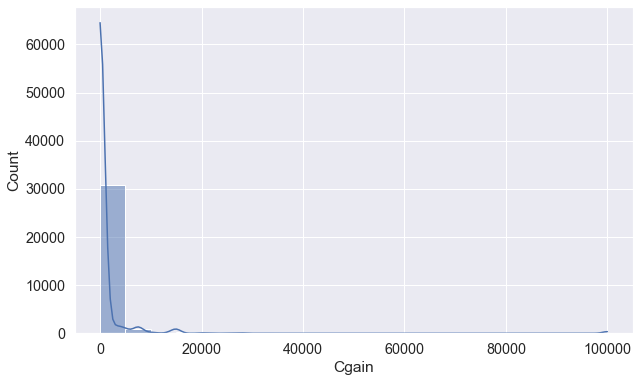

In [365]:
sns.histplot(x="Cgain", data = df, bins=20, kde=True);

In [366]:
df.Cgain.describe()

count   32537.00
mean     1078.44
std      7387.96
min         0.00
25%         0.00
50%         0.00
75%         0.00
max     99999.00
Name: Cgain, dtype: float64

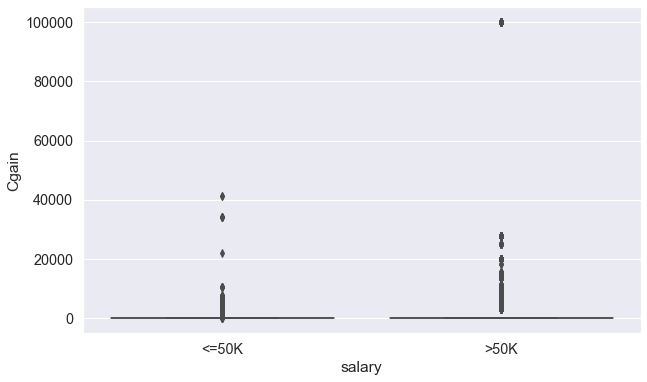

In [367]:
sns.boxplot( x = "salary", y = "Cgain", data=df);

In [368]:
df[(df["salary"] == "<=50K") & (df["Cgain"] > 20000)]

age         workclass  fnlwgt     education  education_num  \
106     17             Other  304873          10th           6.00   
3593    61  Self-emp-not-inc   32423       HS-grad           9.00   
4568    18           Private  301948       HS-grad           9.00   
6433    27           Private  211032     Preschool           1.00   
7186    19           Private  188815       HS-grad           9.00   
15376   55  Self-emp-not-inc  145574       HS-grad           9.00   
17039   20             Other  273701  Some-college          10.00   
20176   63  Self-emp-not-inc  289741       Masters          14.00   

           marital_status       occupation    relationship   race     sex  \
106         Never-married            Other   Not-in-family  White  Female   
3593   Married-civ-spouse  Farming-fishing            Wife  White  Female   
4568        Never-married  Protective-serv   Not-in-family  White    Male   
6433   Married-civ-spouse  Farming-fishing  Other-relative  White    Male   
7186        Never-married    Other-service   Not-in-family  White  Female   
15376            Divorced  Exec-managerial   Not-in-family  White    Male   
17039       Never-married            Other  Other-relative  Black    Male   
20176  Married-civ-spouse  Farming-fishing         Husband  White    Male   

       Cgain  Closs  working_hours        country salary  
106    34095      0             32  United-States  <=50K  
3593   22040      0             40  United-States  <=50K  
4568   34095      0              3  United-States  <=50K  
6433   41310      0             24         Mexico  <=50K  
7186   34095      0             20  United-States  <=50K  
15376  34095      0             60  United-States  <=50K  
17039  34095      0             10  United-States  <=50K  
20176  41310      0             50  United-States  <=50K

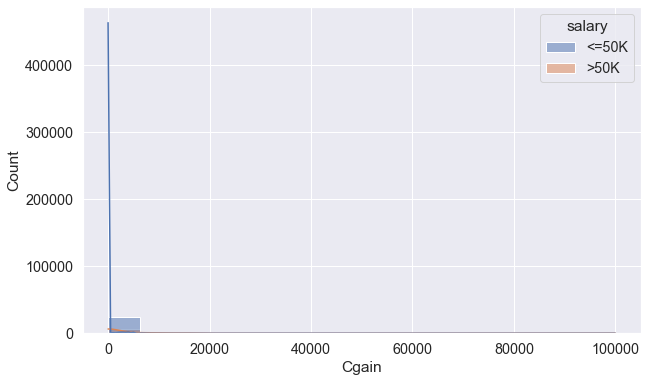

In [369]:
sns.histplot(x="Cgain", hue="salary" ,data = df, kde=True);

In [370]:
df.groupby("salary")["Cgain"].describe()

count    mean      std  min  25%  50%  75%      max
salary                                                       
<=50K  24698.00  148.88   963.56 0.00 0.00 0.00 0.00 41310.00
>50K    7839.00 4007.16 14572.10 0.00 0.00 0.00 0.00 99999.00

In [371]:
df[df["Cgain"] == 0]["salary"].value_counts() / df["salary"].value_counts() * 100

<=50K   95.81
>50K    78.61
Name: salary, dtype: float64

Sermaye kazancı değişkeni üzerinde yapılan incelemeler neticesinde,
1. 159 kişinin sermaye kazancının 99999 dolar olduğunu, bunun muhtemelen daha değişiklik gösterebilecekken veri standardı gereği 100k ile sınırlanmış olabileceğini söyleyebiliriz. Sermaye kazancı yüksek olanlar haliyle 50k üstü maaş alan kişiler sınıfına da girmektedir.
2. Sermaya kazancı yüksek olanların büyük çoğunluğunun özel ve kendi işinde çalışan olduğu yorumunda bulunulabilir.
3. Ortalama sermaye kazancı 1078 USD iken, median 0'dır. Değişken içindeki outlierlar sebebiyle ortalamanın yüksek olduğu söylenebilir.
4. 50k üstü ve 50k altı maaş alanlarda sermaye kazancı median değeri 0'dır. Örneklemin çok büyük çoğunluğunda sermaye kazancı değeri 0'dır. 50k altı olanlarda bu oran %95.8 iken, 50k üstü maaş alanlarda sermaye kazancının 0 olma oranı %78.6'dır.

# CAPITAL LOSS

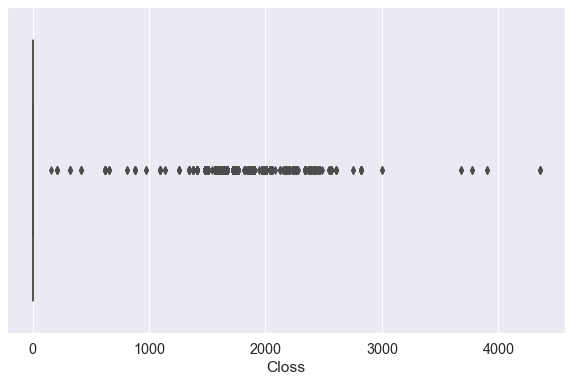

In [372]:
sns.boxplot(x = "Closs", data=df);

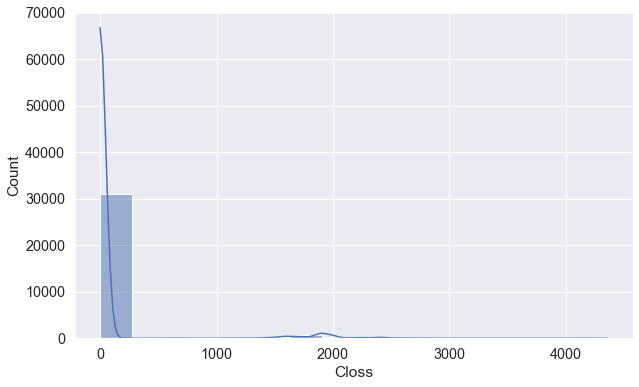

In [373]:
sns.histplot(x="Closs", data = df, kde=True);

In [374]:
df.Closs.describe()

count   32537.00
mean       87.37
std       403.10
min         0.00
25%         0.00
50%         0.00
75%         0.00
max      4356.00
Name: Closs, dtype: float64

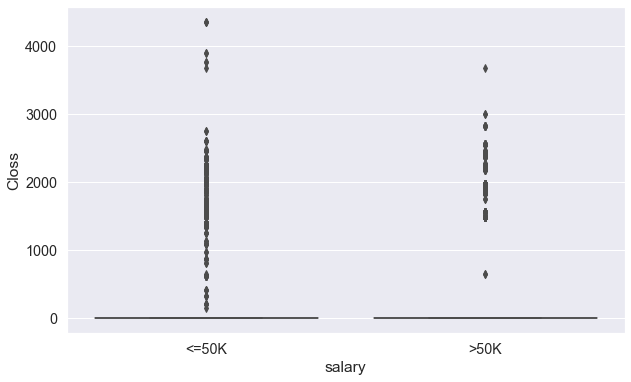

In [375]:
sns.boxplot( x = "salary", y = "Closs", data=df);

In [376]:
df[df["Closs"] > 3000]["salary"].value_counts()

<=50K    8
>50K     3
Name: salary, dtype: int64

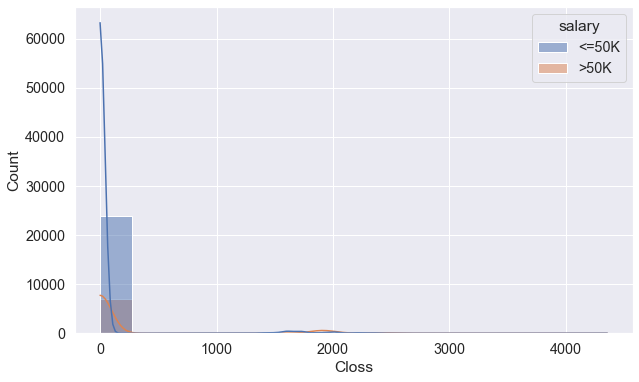

In [377]:
sns.histplot(x="Closs", hue="salary" ,data = df, kde=True);

In [378]:
df.groupby("salary")["Closs"].describe()

count   mean    std  min  25%  50%  75%     max
salary                                                   
<=50K  24698.00  53.19 310.89 0.00 0.00 0.00 0.00 4356.00
>50K    7839.00 195.05 595.56 0.00 0.00 0.00 0.00 3683.00

In [379]:
df[df["Closs"] == 0]["salary"].value_counts() / df["salary"].value_counts() * 100

<=50K   96.98
>50K    90.14
Name: salary, dtype: float64

Sermaye kaybı değişkeni üzerinde yapılan incelemeler neticesinde;
1. Sermaye kaybı örneklem genelinde 0 olarak ortaya çıkmaktadır. Örneklem genelinde 50k altı %97, 50k üstü %90 oran ile 0 sermaye kaybı yaşamıştır.
2. Sermaye kaybı 3000 USD üzerinde olan 11 kişiden 8 tanesi yıllık 50k altı maaş alırken, sadece 3 tanesi yıllık 50k üstü kazanç sağlamaktadır.

# WORKING HOURS PER WEEK

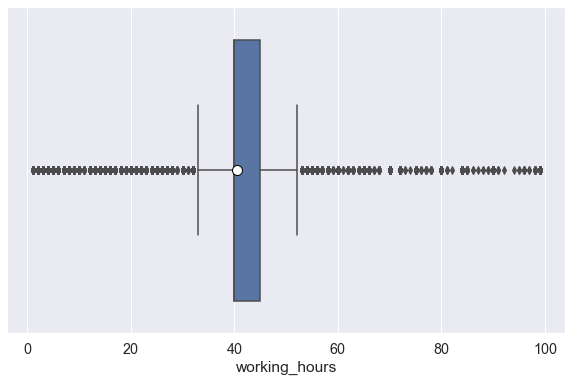

In [380]:
sns.boxplot(x = "working_hours", data=df,
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"});

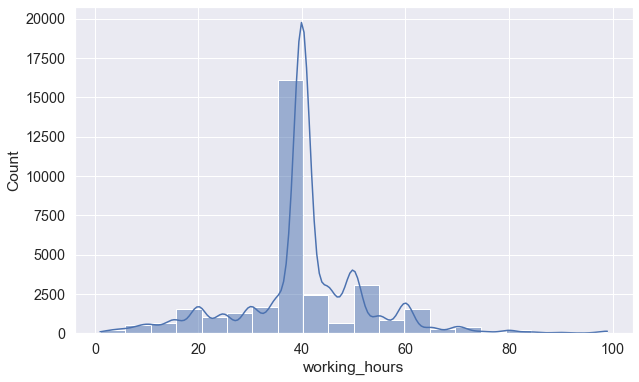

In [381]:
sns.histplot(x="working_hours", data = df, bins=20, kde=True);

In [382]:
df.working_hours.describe()

count   32537.00
mean       40.44
std        12.35
min         1.00
25%        40.00
50%        40.00
75%        45.00
max        99.00
Name: working_hours, dtype: float64

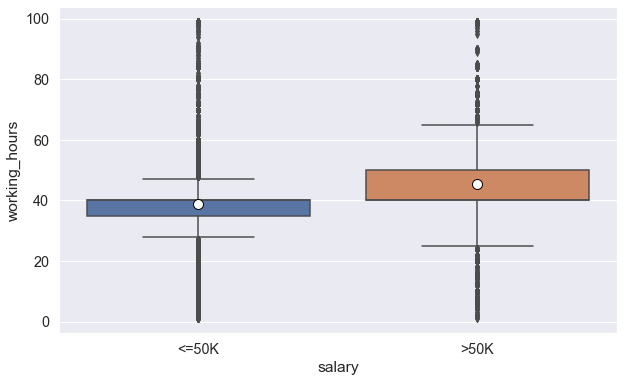

In [383]:
sns.boxplot( x = "salary", y = "working_hours", data=df,
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"});   

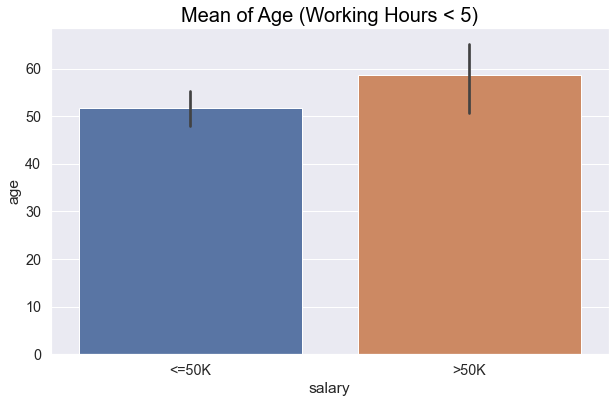

In [384]:
df_hours_min = df[df["working_hours"] < 5][["age","occupation","salary"]]
sns.barplot(x = "salary", y ="age", data=df_hours_min );
plt.title("Mean of Age (Working Hours < 5)", size=20, color ="black");

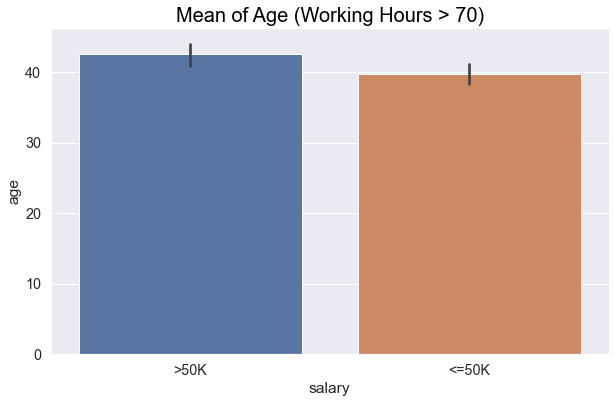

In [385]:
df_hours_max = df[df["working_hours"] > 70][["age","occupation","salary"]]
sns.barplot(x = "salary", y ="age", data=df_hours_max );
plt.title("Mean of Age (Working Hours > 70)", size=20, color ="black");

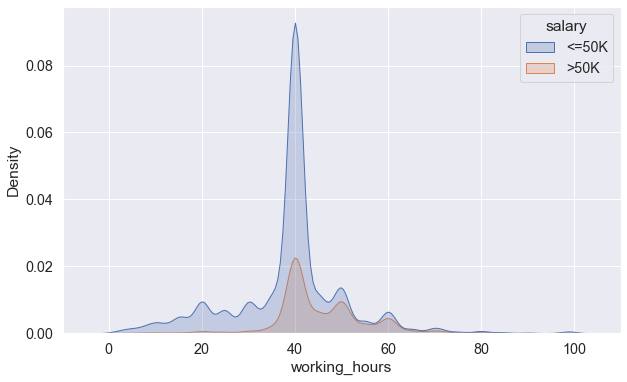

In [386]:
sns.kdeplot(x="working_hours", hue="salary" ,data = df,shade=True);

In [387]:
df.groupby("salary")["working_hours"].describe()

count  mean   std  min   25%   50%   75%   max
salary                                                  
<=50K  24698.00 38.84 12.32 1.00 35.00 40.00 40.00 99.00
>50K    7839.00 45.47 11.01 1.00 40.00 40.00 50.00 99.00

Haftalık çalışma saati değişkeni üzerinde yapılan incelemeler neticesinde;
1. Amerika'da haftaık çalışma saatinin 40 saat olduğu gerçeğinden hareketle yoğunluğun bu saat aralığında olduğu görülmeketdir.
2. 5 saat altı çalışanların yaş ortalamasının 50k altı için 52, 50k üstü kazanç sağlayanlar için ise 58 olduğu görülmektedir.
3. 70 saat üstü çalışanların yaş ortalamasının 50k altı için 40, 50k üstü kazanç sağlayanlar için ise 43 olduğu görülmektedir. Güven aralığının genişliğinden hareketle, yoğun çalışma saatlerinin daha çok orta yaş grubunda çoğaldığı yorumunda bulunulabilir.
4. Boxplot ve kdeplot üzerinden görüleceği üzere 50k altı maaş alanlarda yaş çoğunluğu 40 ve altında iken, 50k üstü maaş alanlarda yaş çoğunluğu 40 ve üstü olanlardadır. Buradan hareketle Amerika'da 50k üstü maaş kazananların genelde 40 yaş ve üstü olduğu yorumunda bulunulabilir.

# SALARY WITH AGE, CAPITAL GAIN AND WORKING HOURS

<Figure size 1152x1008 with 0 Axes>

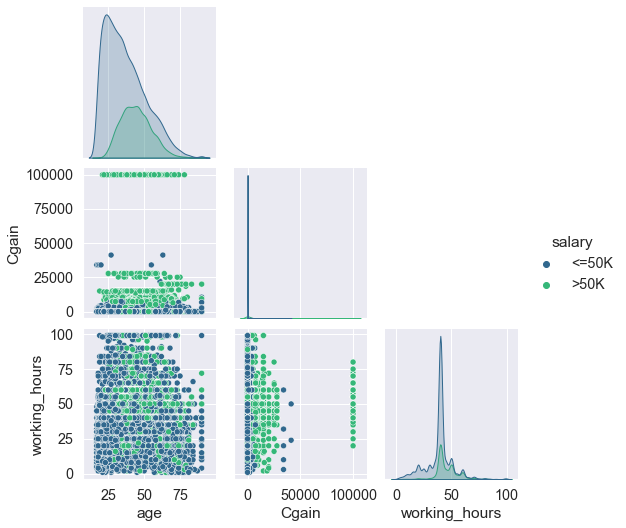

In [388]:
plt.figure(figsize=(16,14))
sns.pairplot(df, hue="salary", palette="viridis",vars=["age","Cgain","working_hours"], corner=True);

Yukarıda yer alan grafiğe göre;
1. Yaş ile haftalık çalışma saatleri arasındaki herhangi bağlayıcı bir ilişki olmadığı, sadece 50k üstü maaş alanların çalışma saatlerinin yaştan bağımsız olarak yüksek olduğunu, 50k altı maaş alanların çalışma saatlerinin de yaştan bağımsız olarak görece olarak düşük kaldığı yorumunda bulunulabilir.
2. 50k üstü kazanç sağlayanların sermaye kazancı 5k ve üzerinde yoğunlaşmakta olup, bu kazancın ilgili kişileri yıllık maaşta 50k üstüne taşımakta yardımcı olduğu yorumunda bulunulabilir.

In [389]:
df.head()

age         workclass  fnlwgt  education  education_num  \
0   39         State-gov   77516  Bachelors          13.00   
1   50  Self-emp-not-inc   83311  Bachelors          13.00   
2   38           Private  215646    HS-grad           9.00   
3   53           Private  234721       11th           7.00   
4   28           Private  338409  Bachelors          13.00   

       marital_status         occupation   relationship   race     sex  Cgain  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   2174   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male      0   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male      0   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male      0   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female      0   

   Closs  working_hours        country salary  
0      0             40  United-States  <=50K  
1      0             13  United-States  <=50K  
2      0             40  United-States  <=50K  
3      0             40  United-States  <=50K  
4      0             40           Cuba  <=50K

#                               CATEGORICAL VARIABLES

# EDUCATION LEVEL

In [390]:
df.groupby("education_num")["education"].value_counts()

education_num  education   
1.00           Preschool          50
2.00           1st-4th           166
3.00           5th-6th           332
4.00           7th-8th           645
5.00           9th               514
6.00           10th              933
7.00           11th             1175
8.00           12th              433
9.00           HS-grad         10494
10.00          Some-college     7282
11.00          Assoc-voc        1382
12.00          Assoc-acdm       1067
13.00          Bachelors        5353
14.00          Masters          1722
15.00          Prof-school       576
16.00          Doctorate         413
Name: education, dtype: int64

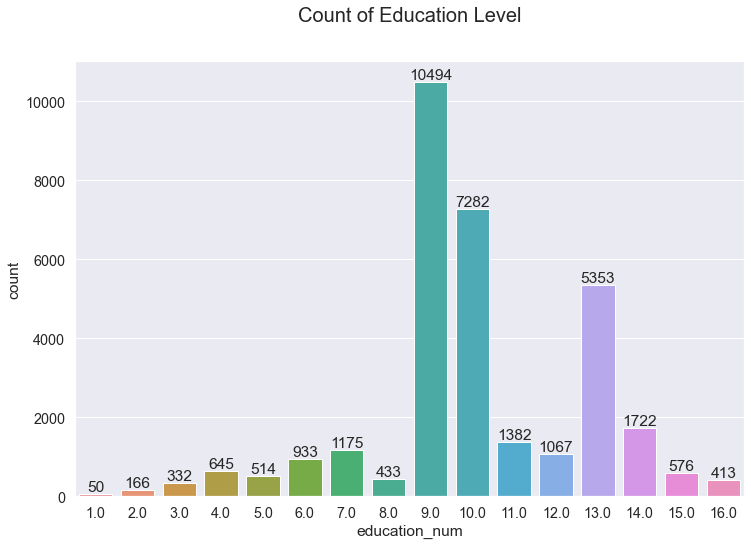

In [391]:
plt.figure(figsize=(12,8))
ax = sns.countplot( x= "education_num", data=df);
sns.set(font_scale = 1.3)
ax.set_title("Count of Education Level", size=20, pad=40)
ax.bar_label(ax.containers[0]);

In [392]:
df["education_level"] = df["education_num"].transform(lambda x: "Primary" if x in [1,2,3,4,5,6,7,8] else 
                                                      ( "Low" if x in [9,10,11,12] else 
                                                       ( "Medium" if x in [13] else "High")))
education_perc = df.education_level.value_counts(normalize=True)
education_perc

Low       0.62
Medium    0.16
Primary   0.13
High      0.08
Name: education_level, dtype: float64

Text(0.5, 1.0, 'Percentage of Education Level')

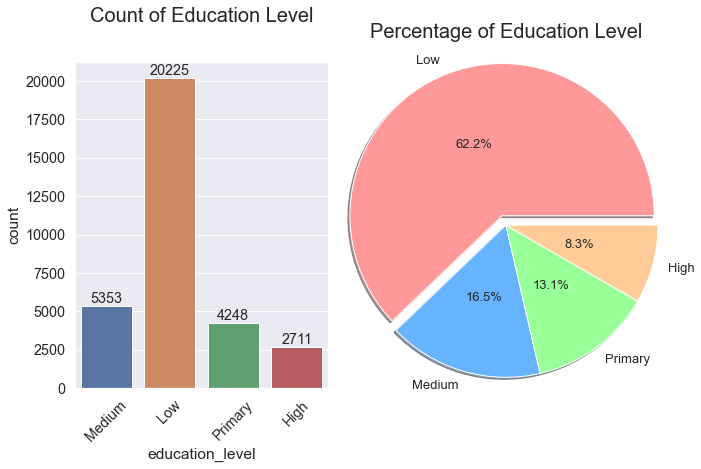

In [393]:
plt.subplot(121)
ax = sns.countplot(x ="education_level", data=df)
plt.xticks(rotation=45)
sns.set(font_scale = 1.2)
ax.set_title("Count of Education Level", size=20, pad=40)
ax.bar_label(ax.containers[0]);
plt.subplot(122)
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
plt.pie( x = education_perc.values, labels=education_perc.index, colors=colors, shadow=True, autopct="%.1f%%",
         pctdistance=0.5, textprops={'fontsize': 13}, radius=1.5, explode=[0.1,0,0,0]);
plt.title("Percentage of Education Level", size=20, pad=60)

In [394]:
education_sal = df.groupby("education_level")["salary"].value_counts(normalize=True)
education_sal

education_level  salary
High             >50K     0.62
                 <=50K    0.38
Low              <=50K    0.82
                 >50K     0.18
Medium           <=50K    0.59
                 >50K     0.41
Primary          <=50K    0.94
                 >50K     0.06
Name: salary, dtype: float64

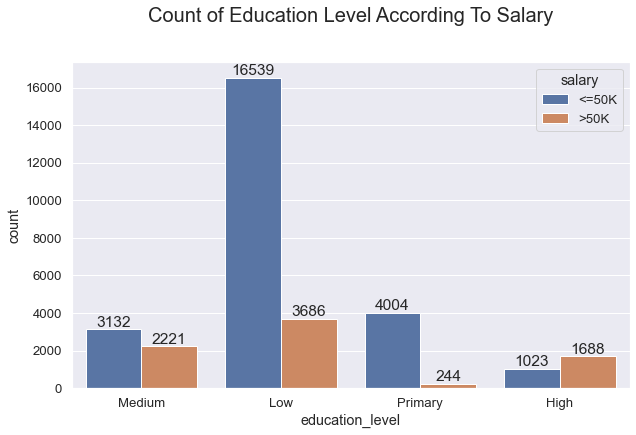

In [395]:
ax = sns.countplot(x ="education_level", data=df, hue="salary");
sns.set(font_scale = 1.3)
ax.set_title("Count of Education Level According To Salary", size=20, pad=40)
for i in ax.containers:
    ax.bar_label(i);

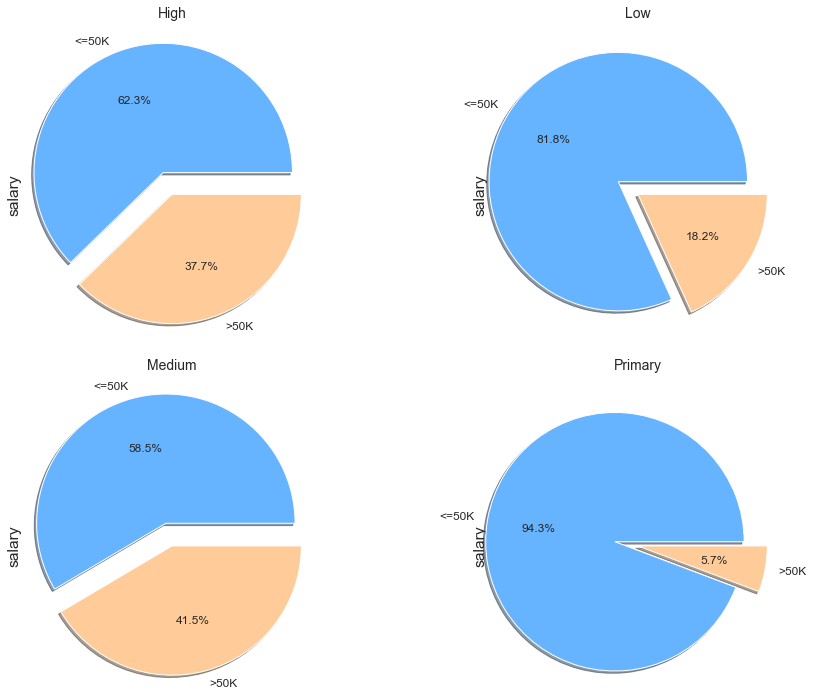

In [396]:
plt.figure(figsize = (14, 10))
index = 1
for i in [0, 2, 4 ,6]:
    plt.subplot(2,2,index)
    education_sal[i:i+2].plot.pie(subplots=True,
                        labels=["<=50K", ">50K"],
                        autopct="%.1f%%",
                        textprops={'fontsize': 12},
                        colors=['#66b3ff','#ffcc99'],
                        explode=[0.2,0], radius=1.1, shadow=True
                        )
    plt.title(education_sal.index[i][0], fontdict = {'fontsize': 14}, pad=30)
    index += 1
plt.tight_layout()

In [397]:
df_edu_salary_count = df.groupby("salary").education_level.value_counts(normalize=True).to_frame().unstack(0)
df_edu_salary_count

education_level     
salary                    <=50K >50K
education_level                     
High                       0.04 0.22
Low                        0.67 0.47
Medium                     0.13 0.28
Primary                    0.16 0.03

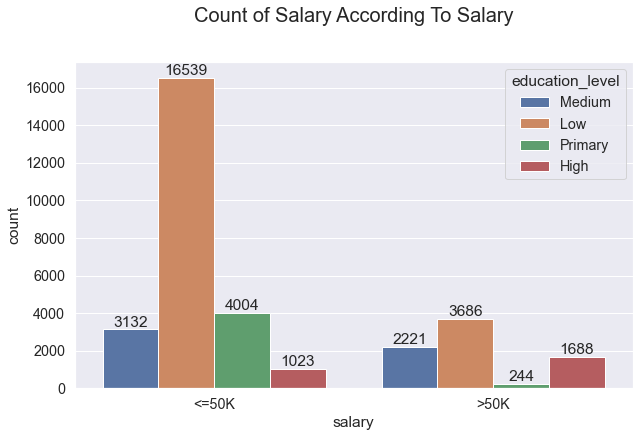

In [398]:
ax= sns.countplot(x ="salary", data=df, hue="education_level")
sns.set(font_scale = 1.3)
ax.set_title("Count of Salary According To Salary", size=20, pad=40)
for i in ax.containers:
    ax.bar_label(i);

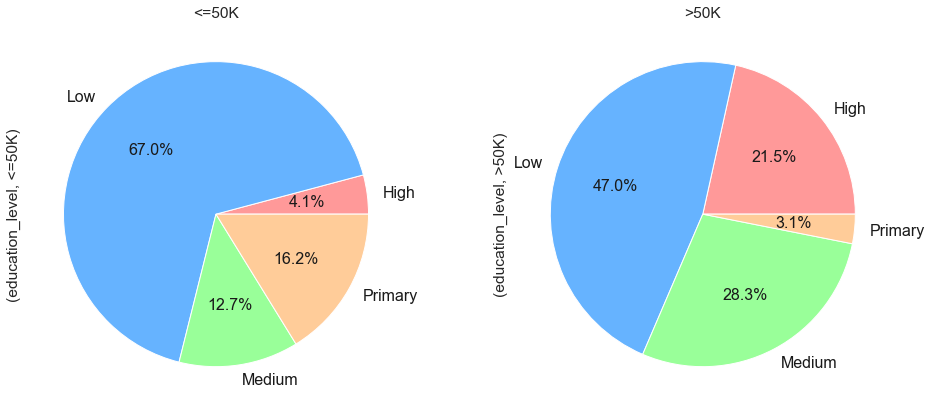

In [399]:
df_edu_salary_count.plot.pie(
                    subplots=True, layout=(1,2),
                    legend=False,
                    colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'],
                    autopct='%.1f%%',
                    
                    title=["<=50K",">50K"],
                    textprops={'fontsize':16, 'color':'k'},
                    figsize=(14,6));
 
plt.tight_layout()

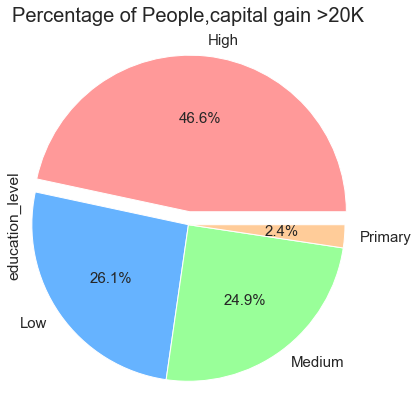

In [400]:
df[df.Cgain > 20000]["education_level"].value_counts().plot.pie( autopct="%.1f%%",radius=1.2, fontsize=15, colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99'], explode=[0.1,0,0,0]);
plt.title("Percentage of People,capital gain >20K", pad=40, fontsize=20);

Eğitim seviyesi üzerine yapılan incelemeler neticesinde;
1. Alınan örneklemde yapılan inceleme neticesinde eğitim dereceleri 4 ana başlık altında toplandığında en büyük payı %62 ile lise ve kolej mezunlarının kapsadığı görülmüştür. Lise mezunlarını %16,5 ile üniversite mezunları takip etmektedir.
2. Eğitim seviyesi yükseldikçe yıllık kazanç oranında bariz şekilde artış olduğu oransal olarak net bir şekilde ifade edilebilir. Primary eğitim seviyesinde, %94,3 oranında 50k altı kazanç var iken, High level eğitim seviyesinde 50k altı kazanç oranı sadece %37.7'de kalmıştır.
3. Genel örneklem kapsamında lise mezunları örneklemin en fazla alanını kapsayan grup olduğu için (her ne kadar yıllık kazanç dağılımında kendi içinde bariz fark olmuş olsa da) örneklem genelinde 50K üstü maaş alanların %47'si ile en fazla orana sahip eğitim sınıfı olarak karşımıza çıkmaktadır. Burada özellikle vurgulanması gereken, eğitim seivyesi arttıkça yıllık kazancın artmakta olduğu bilgisidir. Low level eğitim seviyesindeki kişilerin sayısı çok olduğu için 50k altı ve üstü iki grafikte de en fazla alanı low-level eğitim seviyesine sahip kişiler tutmaktadır.
4. Sermaye kazancında dahi 20k USD'den fazla kazanç sağlayanların, yüksek eğitim seviyesine sahip kişiler olduğu kolaylıkla görülmekte olup, kazancın eğitim seviyesiyle doğru orantılı olduğu rahatlıkla söylenebilir.

# WORKCLASS

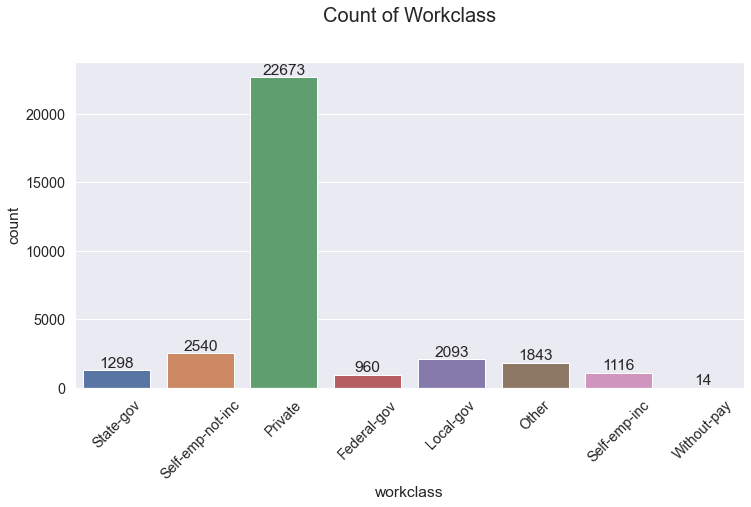

In [401]:
plt.figure(figsize=(12,6))
ax = sns.countplot( x= "workclass", data=df);
sns.set(font_scale = 1.3)
plt.xticks(rotation=45)
ax.set_title("Count of Workclass", size=20, pad=40)
for i in ax.containers:
    ax.bar_label(i);


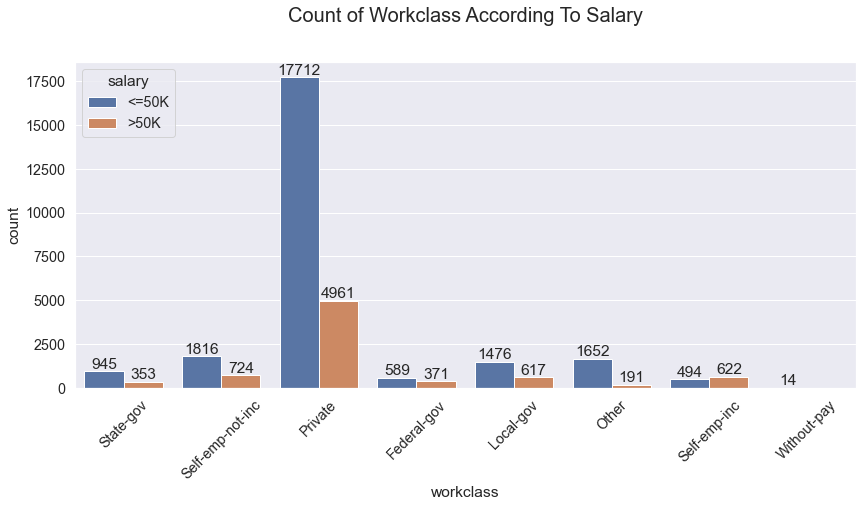

In [402]:
plt.figure(figsize=(14,6))
ax = sns.countplot( x= "workclass", data=df, hue="salary");
sns.set(font_scale = 1.3)
plt.xticks(rotation=45)
ax.set_title("Count of Workclass According To Salary", size=20, pad=40)
for i in ax.containers:
    ax.bar_label(i);


In [403]:
df["workclass_sum"] = df["workclass"].transform(lambda x: "Private" if x in ["Private"] else 
                                                ( "Self_emp" if x in ["Self-emp-not-inc","Self-emp-inc"] else 
                                                 ( "Gov" if x in ["Federal-gov","Local-gov","State-gov"] else "Other")))
df.workclass_sum.unique()


array(['Gov', 'Self_emp', 'Private', 'Other'], dtype=object)

In [404]:
workclass_count = df.workclass_sum.value_counts(normalize=True)
workclass_count

Private    0.70
Gov        0.13
Self_emp   0.11
Other      0.06
Name: workclass_sum, dtype: float64

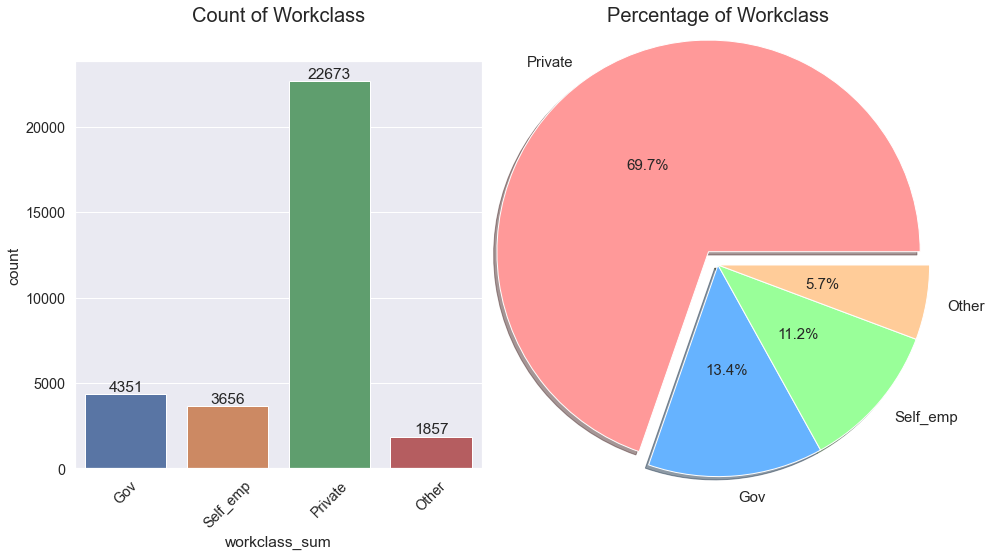

In [405]:
plt.figure(figsize=(14,8))
plt.subplot(121)
ax = sns.countplot(x ="workclass_sum", data=df)
sns.set(font_scale = 1.3)
plt.xticks(rotation=45)
plt.title("Count of Workclass", size=20, pad=40)
for i in ax.containers:
    ax.bar_label(i);
plt.subplot(122)
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99',"gold"]
plt.pie( x = workclass_count.values, labels=workclass_count.index, colors=colors, shadow=True, autopct="%.1f%%",
         pctdistance=0.5, textprops={'fontsize': 15}, radius=1.3, explode=[0.1,0,0,0]);
plt.title("Percentage of Workclass", size=20, pad=40)
plt.tight_layout()

In [406]:
df_workclass_count = df.groupby("workclass_sum")["salary"].value_counts(normalize=True).to_frame().unstack(0)
df_workclass_count

salary                       
workclass_sum    Gov Other Private Self_emp
salary                                     
<=50K           0.69  0.90    0.78     0.63
>50K            0.31  0.10    0.22     0.37

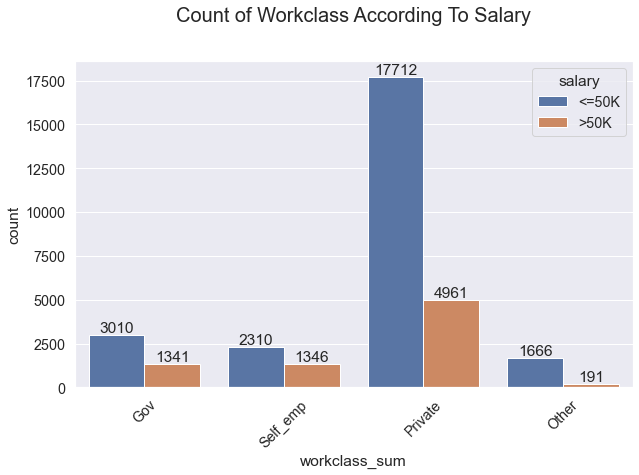

In [407]:
ax = sns.countplot(x ="workclass_sum", data=df, hue="salary");
sns.set(font_scale = 1.3)
plt.xticks(rotation=45)
ax.set_title("Count of Workclass According To Salary", size=20, pad=40)
for i in ax.containers:
    ax.bar_label(i);

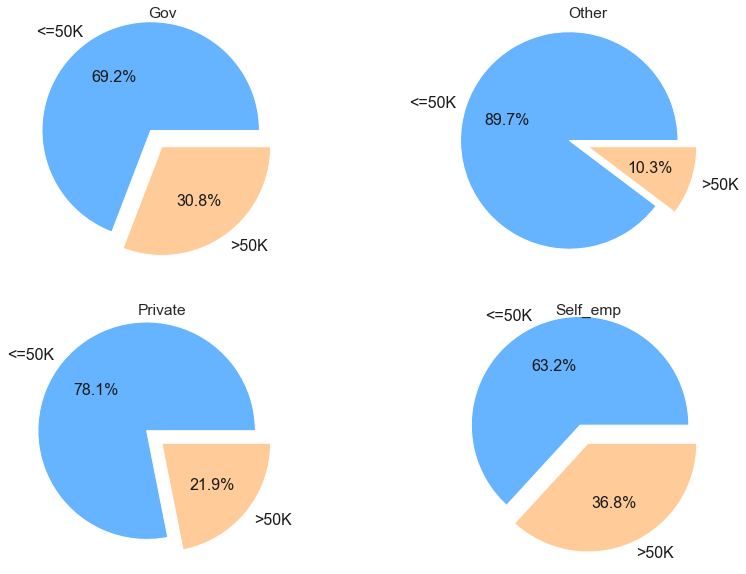

In [408]:
df_workclass_count.plot.pie(subplots=True, layout=(2,2),
                    legend=False,
                    colors=['#66b3ff','#ffcc99'],
                    explode=[0.2,0],
                    autopct='%.1f%%',
                    ylabel="",
                    title=["Gov","Other","Private","Self_emp"],
                    textprops={'fontsize':16, 'color':'k'},
                    radius=1.1,
                    figsize=(14,10));


In [409]:
df_workclass_salary = df.groupby("salary")["workclass_sum"].value_counts(normalize=True).to_frame().unstack(0)
df_workclass_salary

workclass_sum     
salary                <=50K >50K
workclass_sum                   
Gov                    0.12 0.17
Other                  0.07 0.02
Private                0.72 0.63
Self_emp               0.09 0.17

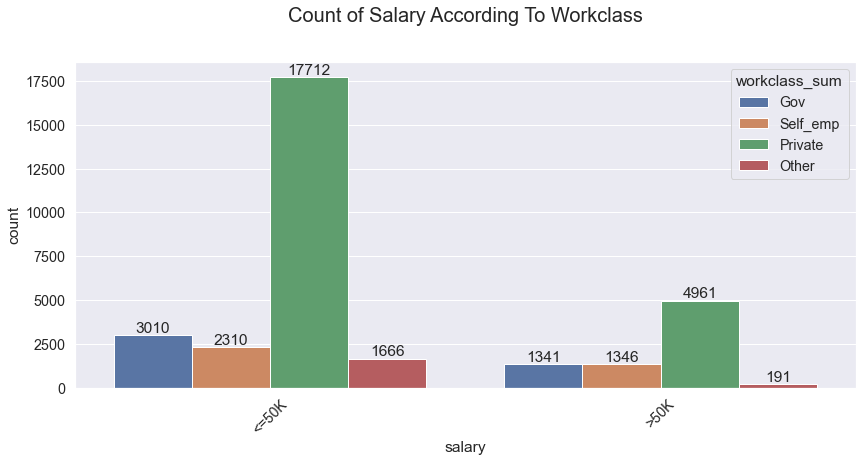

In [410]:
plt.figure(figsize=(14,6))
ax = sns.countplot(x ="salary", data=df, hue="workclass_sum");
sns.set(font_scale = 1.3)
plt.xticks(rotation=45)
ax.set_title("Count of Salary According To Workclass", size=20, pad=40)
for i in ax.containers:
    ax.bar_label(i);

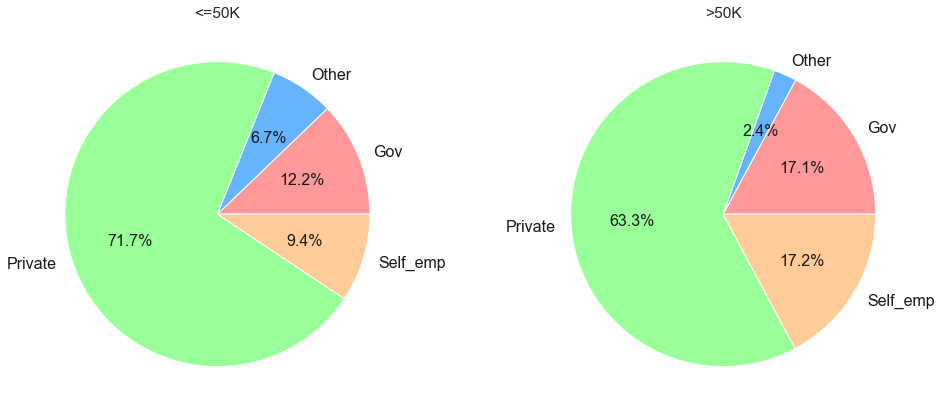

In [411]:
df_workclass_salary.plot.pie(
                    subplots=True, layout=(1,2),
                    legend=False,
                    colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'],
                    autopct='%.1f%%',
                    ylabel="",
                    title=["<=50K",">50K"],
                    textprops={'fontsize':16, 'color':'k'},
                    figsize=(14,6));
 
plt.tight_layout()

İş kolu ile ilgili değişken incelendiğinde;
1. Değişkenleri gruplandırmanın daha faydalı olacağı değerlendirilerek, iş kolları 4 ana başlık altında toplanmıştır. Bunun neticesinde örneklem içerisindeki en yüksek grup %69,7 oranla private, onu takiben %13.4 ile government personeli gelmektedir.
2. 50k üstü yıllık kazanç sağlayan en yüksek grup oransal (kendi içindeki oranla) olarak self-employed grubunda yer alanlardır. Bunları takiben kendi içindeki oranla 2. sırada devlet-eyalet personeli gelmekte, en son sırada ise özel çalışanlar gelmektedir. Amerika'da devlet personelleri arasında ise 50K üstü en yüksek maaş oranı Fedarel hükümet personeli olarak gözükmektedir.
3. Örneklemin genelinde ise aynı eğitim seviyesinde olduğu üzere private grubunda yer alanlar 50K üstü ve altında en yüksek orana sahiptirler. Örneklemde genel itibaryle 50k üstü maaştan yola çıkılarak en yüksek maaşı kendi işinde çalışanlar ve eyalet personelinin aldığı yorumunda bulunulabilir. 

# MARITAL STATUS

In [412]:
df.marital_status.value_counts()

Married-civ-spouse       14970
Never-married            10667
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64

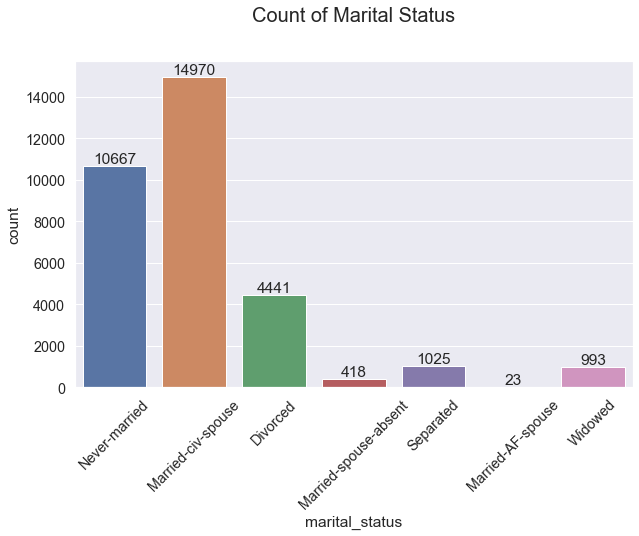

In [413]:
ax = sns.countplot( x= "marital_status", data=df);
sns.set(font_scale = 1.3)
plt.xticks(rotation=45)
ax.set_title("Count of Marital Status", size=20, pad=40)
for i in ax.containers:
    ax.bar_label(i);

In [414]:
df.groupby("relationship")["marital_status"].value_counts()

relationship    marital_status       
Husband         Married-civ-spouse       13229
                Married-AF-spouse            9
Not-in-family   Never-married             9175
                Divorced                  2580
                Widowed                    562
                Separated                  466
                Married-spouse-absent      226
                Married-civ-spouse          17
Other-relative  Never-married              611
                Married-civ-spouse         124
                Divorced                   110
                Separated                   55
                Widowed                     48
                Married-spouse-absent       32
                Married-AF-spouse            1
Unmarried       Divorced                  1751
                Never-married              881
                Separated                  504
                Widowed                    383
                Married-spouse-absent      160
Wife            Marrie

In [415]:
df["marital_sum"] = df["marital_status"].transform(lambda x: "Married" if x in ["Married-civ-spouse","Married-AF-spouse"] else "Unmarried")
df.marital_sum.value_counts()

Unmarried    17544
Married      14993
Name: marital_sum, dtype: int64

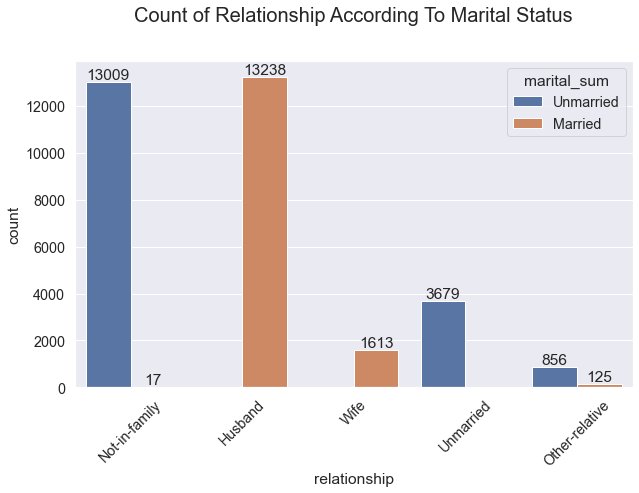

In [416]:
ax = sns.countplot(x="relationship", hue="marital_sum", data=df);
sns.set(font_scale = 1.3)
plt.xticks(rotation=45)
ax.set_title("Count of Relationship According To Marital Status", size=20, pad=40)
for i in ax.containers:
    ax.bar_label(i);

In [417]:
df[(df["relationship"] == "Not-in-family") &(df["marital_sum"] == "Married")]

age         workclass  fnlwgt     education  education_num  \
1172    25           Private  404616       Masters          14.00   
2509    31           Private  133770    Assoc-acdm          12.00   
4107    52           Private  416129     Preschool           1.00   
8053    29             Other  189282       HS-grad           9.00   
8847    27             Other  291547     Bachelors          13.00   
9836    56         State-gov   54260     Doctorate          16.00   
11915   39           Private   22245     Bachelors          13.00   
12241   28           Private  410216          11th           7.00   
13141   28  Self-emp-not-inc  107236          12th           8.00   
15834   25           Private  250038       Masters          14.00   
16727   30           Private  102821  Some-college          10.00   
20436   47             Other  186805       HS-grad           9.00   
25939   18           Private  184016       HS-grad           9.00   
26214   24           Private  161638       HS-grad           9.00   
26995   33           Private  228696       1st-4th           2.00   
27593   31  Self-emp-not-inc  369648    Assoc-acdm          12.00   
30368   26           Private  187248       HS-grad           9.00   

           marital_status         occupation   relationship  \
1172   Married-civ-spouse    Farming-fishing  Not-in-family   
2509   Married-civ-spouse       Craft-repair  Not-in-family   
4107   Married-civ-spouse      Other-service  Not-in-family   
8053   Married-civ-spouse              Other  Not-in-family   
8847   Married-civ-spouse              Other  Not-in-family   
9836   Married-civ-spouse     Prof-specialty  Not-in-family   
11915  Married-civ-spouse     Prof-specialty  Not-in-family   
12241  Married-civ-spouse       Craft-repair  Not-in-family   
13141  Married-civ-spouse       Craft-repair  Not-in-family   
15834  Married-civ-spouse  Machine-op-inspct  Not-in-family   
16727  Married-civ-spouse       Craft-repair  Not-in-family   
20436  Married-civ-spouse              Other  Not-in-family   
25939  Married-civ-spouse    Priv-house-serv  Not-in-family   
26214  Married-civ-spouse  Machine-op-inspct  Not-in-family   
26995  Married-civ-spouse       Craft-repair  Not-in-family   
27593  Married-civ-spouse       Craft-repair  Not-in-family   
30368  Married-civ-spouse     Prof-specialty  Not-in-family   

                     race     sex  Cgain  Closs  working_hours        country  \
1172                White    Male      0      0             99  United-States   
2509   Asian-Pac-Islander    Male      0      0             50  United-States   
4107                White    Male      0      0             40    El-Salvador   
8053                White  Female      0      0             27  United-States   
8847                Other  Female      0      0              6         Mexico   
9836   Asian-Pac-Islander    Male   2885      0             40          China   
11915               White    Male      0      0             60  United-States   
12241               White    Male      0      0             60  United-States   
13141               White    Male      0      0             40  United-States   
15834               White    Male      0      0             40         Mexico   
16727               White    Male      0      0             40         Mexico   
20436               White  Female      0      0             35  United-States   
25939               White  Female   3103      0             40  United-States   
26214               White  Female      0      0             40        Ecuador   
26995               White    Male      0   2603             32         Mexico   
27593               White    Male      0      0             50  United-States   
30368               Black    Male      0      0             40  United-States   

      salary education_level workclass_sum marital_sum  
1172    >50K            High       Private     Married  
2509    >50K             Low       Private     Married  

In [418]:
df[df.marital_status == "Married-civ-spouse"]["relationship"].value_counts()

Husband           13229
Wife               1600
Other-relative      124
Not-in-family        17
Name: relationship, dtype: int64

In [419]:
df[df.relationship == "Other-relative"]["marital_status"].value_counts()

Never-married            611
Married-civ-spouse       124
Divorced                 110
Separated                 55
Widowed                   48
Married-spouse-absent     32
Married-AF-spouse          1
Name: marital_status, dtype: int64

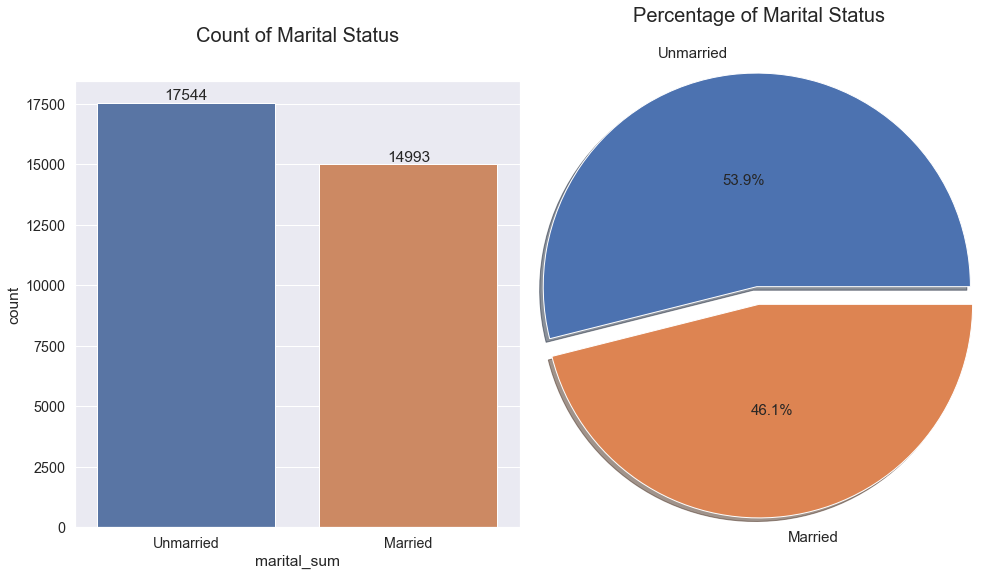

In [420]:
plt.figure(figsize=(14,8))
plt.subplot(121)
ax = sns.countplot(x ="marital_sum", data=df)
sns.set(font_scale = 1.3)
ax.set_title("Count of Marital Status", size=20, pad=40)
for i in ax.containers:
    ax.bar_label(i);

plt.subplot(122)
plt.pie( x = df.marital_sum.value_counts().values, labels=df.marital_sum.value_counts().index,  shadow=True, autopct="%.1f%%",
         pctdistance=0.5, textprops={'fontsize': 15}, radius=1.2, explode=[0.1,0]);
plt.title("Percentage of Marital Status", size=20, pad=60)
plt.tight_layout()

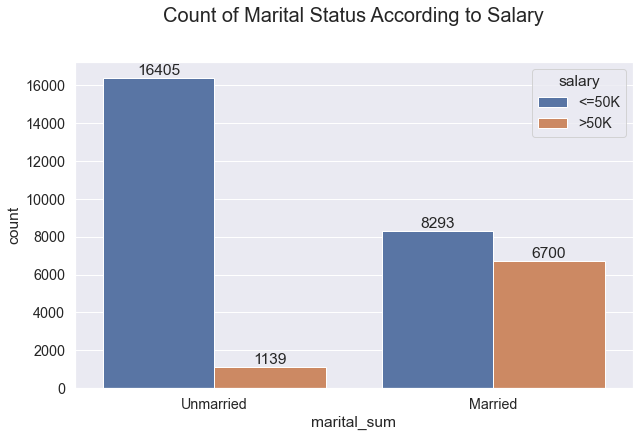

In [421]:
ax =sns.countplot(x ="marital_sum", data=df, hue="salary");
sns.set(font_scale = 1.3)
ax.set_title("Count of Marital Status According to Salary", size=20, pad=40)
for i in ax.containers:
    ax.bar_label(i);

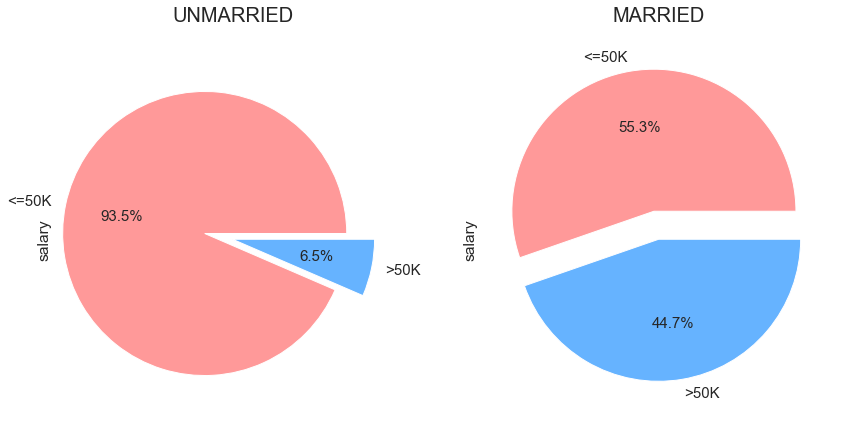

In [422]:
plt.figure(figsize=(14,10))
plt.subplot(121)
df[df["marital_sum"] == "Unmarried"]["salary"].value_counts().plot.pie( autopct="%.1f%%", fontsize=15, explode=[0.2,0],colors = ['#ff9999','#66b3ff']);
plt.title("UNMARRIED",fontsize=20, pad=40)
plt.subplot(122)
df[df["marital_sum"] == "Married"]["salary"].value_counts().plot.pie(autopct="%.1f%%", fontsize=15, explode=[0.2,0],colors = ['#ff9999','#66b3ff']);
plt.title("MARRIED",fontsize=20,pad=40);

In [423]:
values_less = df.groupby("salary")["marital_sum"].value_counts(normalize=True)["<=50K"]
values_more = df.groupby("salary")["marital_sum"].value_counts(normalize=True)[">50K"]

In [424]:
df_marital_sum = df.groupby("salary")["marital_sum"].value_counts(normalize=True).to_frame().unstack(0)
df_marital_sum

marital_sum     
salary            <=50K >50K
marital_sum                 
Married            0.34 0.85
Unmarried          0.66 0.15

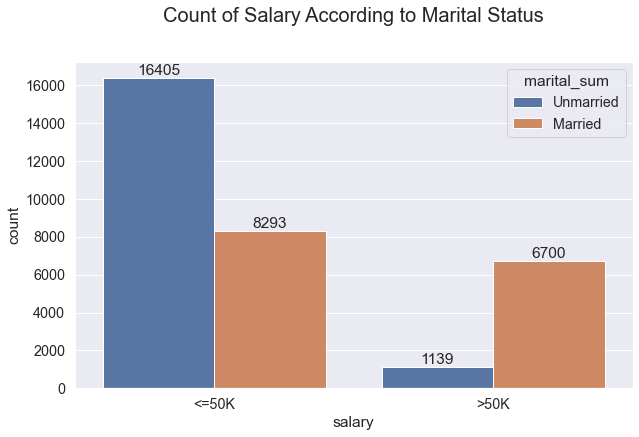

In [425]:
ax = sns.countplot(x ="salary", data=df, hue="marital_sum");
sns.set(font_scale = 1.3)
ax.set_title("Count of Salary According to Marital Status", size=20, pad=40)
for i in ax.containers:
    ax.bar_label(i);

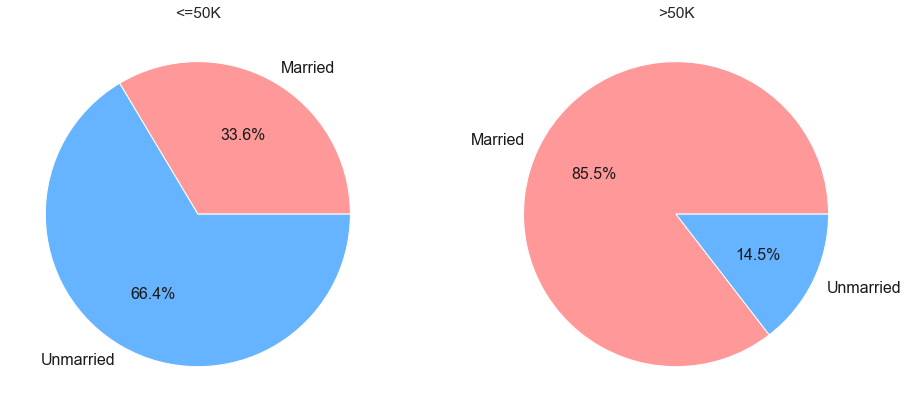

In [426]:
df_marital_sum.plot.pie(
                    subplots=True, layout=(1,2),
                    legend=False,
                    colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'],
                    autopct='%.1f%%',
                    ylabel="",
                    title=["<=50K",">50K"],
                    textprops={'fontsize':16, 'color':'k'},
                    figsize=(14,6));
 
plt.tight_layout()

Evlilik değişkeni üzerine yapılan kontroller neticesinde;
1. Değişkeni daha anlamlı hale getirmek ve analizleri kolaylaştırmak adına evlilik değişkenini, evli ve evli olmayan olarak 2 sınıfa ayırdığımızda, örneklem genelinde evlilik oranının %53.9 evli olamayn, %46.1 evli ile birbirine yakın olduğu görülmeketdir.
2. Evli olmayanlarda 50k üstü yıllık kazanç oranının %6.5 ile çok düşük olduğu görülebilmektedir. Evli olanlarda bu oran anlamlı bir şekilde değişmekte %44.7'ye çıkmaktadır. Evli olanlarda 50k altı ve üstünde kazançta neredeyse yarı yarıya bir oran ortaya çıkmaktadır. 
3. Yıllık kazanç bağlamında yaklaşıldığında ise 50k altı kazanç sağlayanların %66.4'ünün evli olmadığı,50k üstü kazanç sağlayanların ise %85.5'inin evli olduğu gerçeği karşımıza çıkmaktadır.
4. İlişkiler değişkeni içerisinde evli olmasına rağmen "Not-in-family" değerini alanların değerleri 17 adet olup, bu değişkenin içeriği sebebiyle başka yerde kullanılmayacağı için bu farklılığa müdahale edilmemiştir.  

# OCCUPATION

In [427]:
occupation_count = df.occupation.value_counts(normalize=True)*100
occupation_count

Prof-specialty      12.71
Craft-repair        12.58
Exec-managerial     12.49
Adm-clerical        11.58
Sales               11.22
Other-service       10.11
Machine-op-inspct    6.15
Other                5.66
Transport-moving     4.91
Handlers-cleaners    4.21
Farming-fishing      3.05
Tech-support         2.85
Protective-serv      1.99
Priv-house-serv      0.45
Armed-Forces         0.03
Name: occupation, dtype: float64

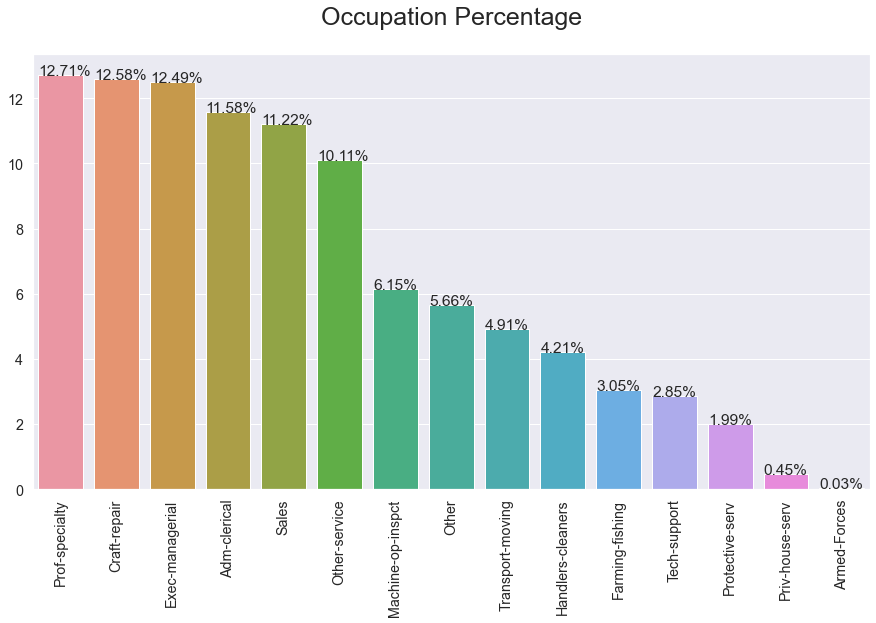

In [428]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x= occupation_count.index, y=occupation_count.values);
plt.xticks(rotation=90)
for p in ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    ax.annotate(txt,(txt_x,txt_y));
plt.title("Occupation Percentage", fontsize=25 ,pad=30);

In [429]:
occupation_less = df.groupby("salary")["occupation"].value_counts(normalize=True)["<=50K"]
occupation_more = df.groupby("salary")["occupation"].value_counts(normalize=True)[">50K"]

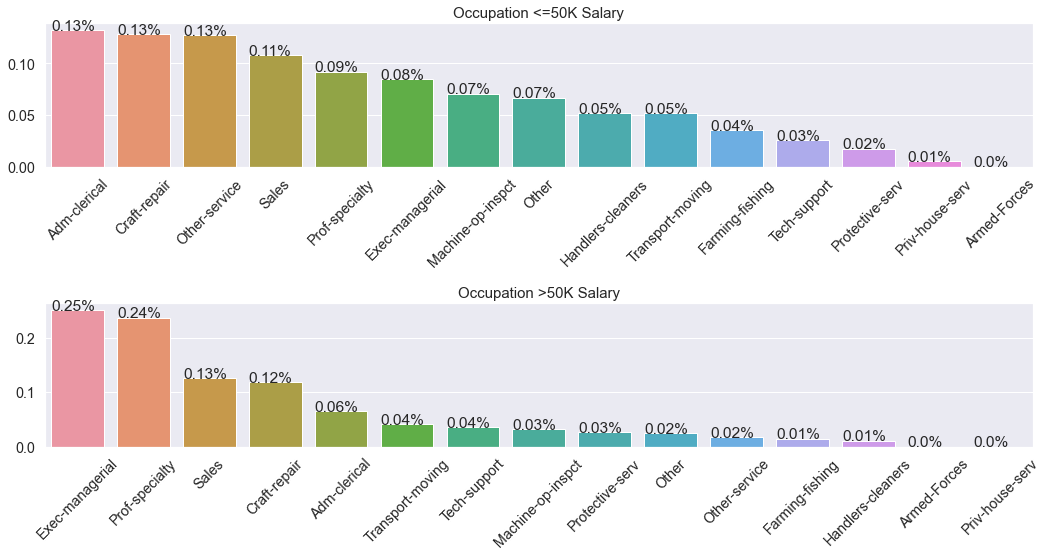

In [430]:
fig, ax = plt.subplots(figsize=(15,8))
plt.subplot(211)
ax = sns.barplot(x= occupation_less.index, y=occupation_less.values);
plt.xticks(rotation=45)
plt.xlabel("")
plt.title("Occupation <=50K Salary", fontsize=15)
for p in ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    ax.annotate(txt,(txt_x,txt_y));
plt.subplot(212)
ax = sns.barplot(x= occupation_more.index, y=occupation_more.values);
plt.xticks(rotation=45)
plt.title("Occupation >50K Salary", fontsize=15)
plt.xlabel("")
for p in ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    ax.annotate(txt,(txt_x,txt_y));
plt.tight_layout()

Meslek dağılımlarına yçnelik yapılan inceleme neticesinde;
1. Örneklem içerisinde en yüksek orandaki meslek bir konuda uzmanlaşmış kişilerden oluşmakta olup, onları tamirciler ve yöneticilerin takip ettiği görülmektedir.
2. Maaş bağlamında yapılan incelemede 50k üstü maaş alanlarda en yüksek oran yöneticilerde olup, 50k altı maaş alanlarda ise en yüksek oran memurlarda görülmektedir.

# RACE

In [431]:
df["race"].value_counts(normalize=True)*100

White                85.43
Black                 9.60
Asian-Pac-Islander    3.19
Amer-Indian-Eskimo    0.96
Other                 0.83
Name: race, dtype: float64

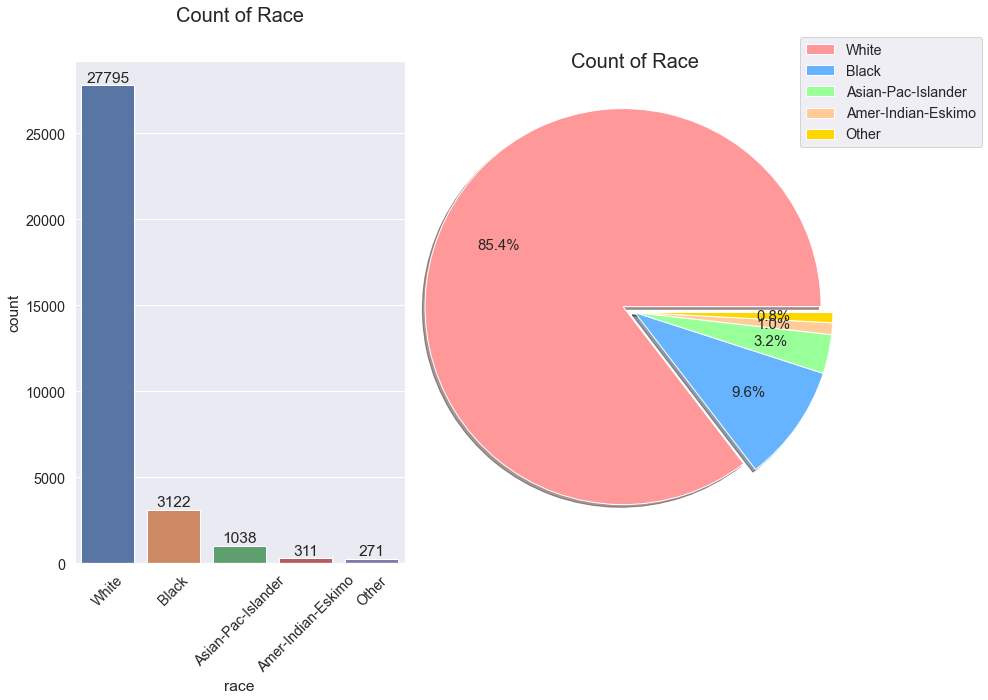

In [432]:
plt.figure(figsize=(14,10))
plt.subplot(121)
ax = sns.countplot(x = "race", data=df)
plt.xticks(rotation=45)
ax.set_title("Count of Race", size=20, pad=40)
for i in ax.containers:
    ax.bar_label(i);

plt.subplot(122)
plt.pie( x = df.race.value_counts().values,  shadow=True, autopct="%.1f%%",
         pctdistance=0.7, textprops={'fontsize': 15}, radius=1.5, explode=[0.1,0,0,0,0],colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99',"gold"]);
plt.legend(labels=df.race.value_counts().index, loc=(1,1))
plt.title("Count of Race", size=20, pad=80)
plt.tight_layout()

In [433]:
df_race = df.groupby("race")["salary"].value_counts(normalize=True).to_frame().unstack(0)
df_race

salary                                     
race   Amer-Indian-Eskimo Asian-Pac-Islander Black Other White
salary                                                        
<=50K                0.88               0.73  0.88  0.91  0.74
>50K                 0.12               0.27  0.12  0.09  0.26

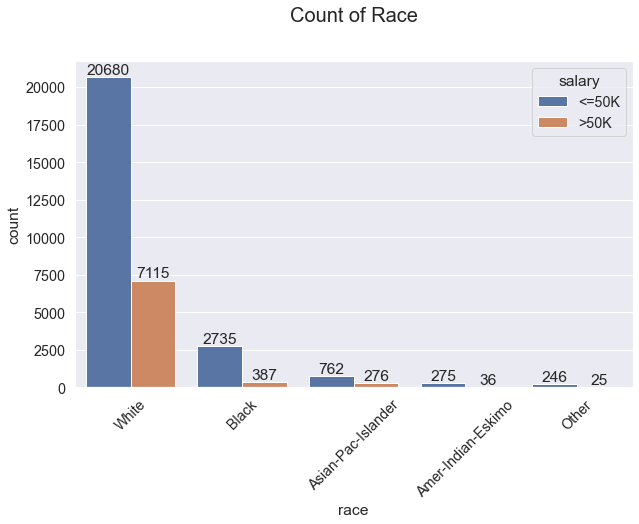

In [434]:
ax = sns.countplot( x="race", data=df, hue="salary");
plt.xticks(rotation=45)
ax.set_title("Count of Race", size=20, pad=40)
for i in ax.containers:
    ax.bar_label(i);

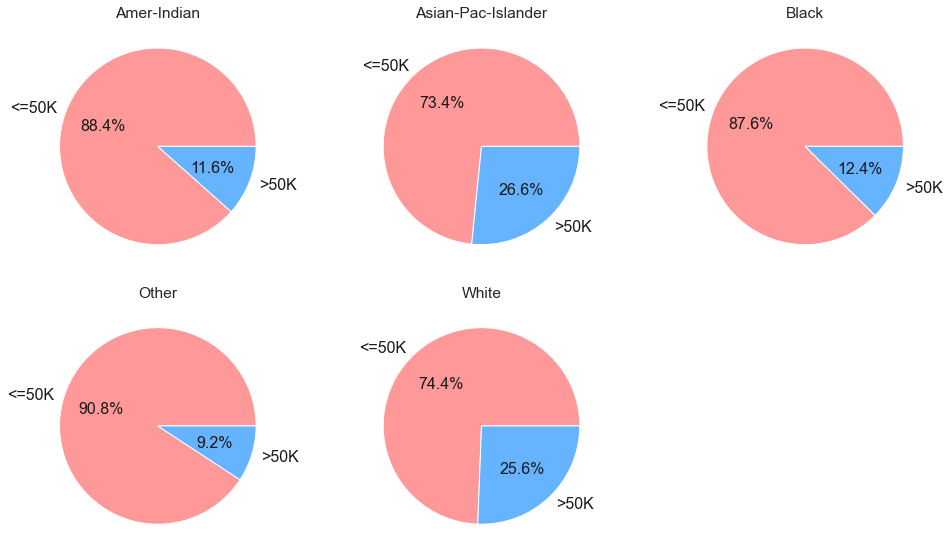

In [435]:
df_race.plot.pie(
                    subplots=True, layout=(2,3),
                    legend=False,
                    colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'],
                    autopct='%.1f%%',
                    ylabel="",
                    title=["Amer-Indian","Asian-Pac-Islander","Black","Other","White"],
                    textprops={'fontsize':16, 'color':'k'},
                    figsize=(14,8));
 
plt.tight_layout()

In [436]:
df_race_salary = df.groupby("salary")["race"].value_counts(normalize=True).to_frame().unstack(0)
df_race_salary

race     
salary             <=50K >50K
race                         
Amer-Indian-Eskimo  0.01 0.00
Asian-Pac-Islander  0.03 0.04
Black               0.11 0.05
Other               0.01 0.00
White               0.84 0.91

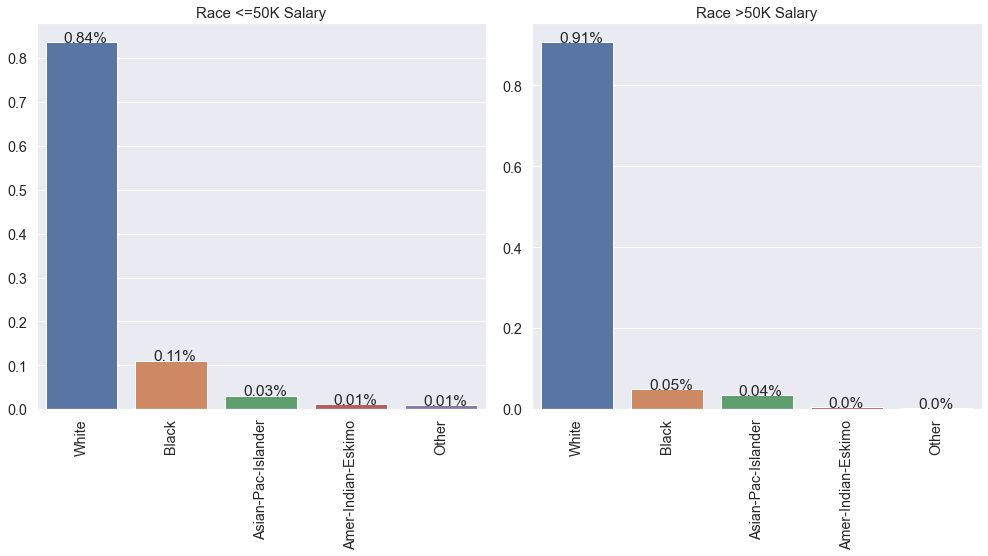

In [437]:
values_less =df.groupby("salary")["race"].value_counts(normalize=True)["<=50K"]
values_more =df.groupby("salary")["race"].value_counts(normalize=True)[">50K"]
plt.figure(figsize=(14,8))
plt.subplot(121)
ax = sns.barplot(x= values_less.index, y=values_less.values);
plt.xticks(rotation=90)
plt.xlabel("")
plt.title("Race <=50K Salary", fontsize=15)
for p in ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    ax.annotate(txt,(txt_x+0.2,txt_y));
plt.subplot(122)
ax = sns.barplot(x= values_more.index, y=values_more.values);
plt.xticks(rotation=90)
plt.title("Race >50K Salary", fontsize=15)
plt.xlabel("")
for p in ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    ax.annotate(txt,(txt_x+0.2,txt_y));
plt.tight_layout()

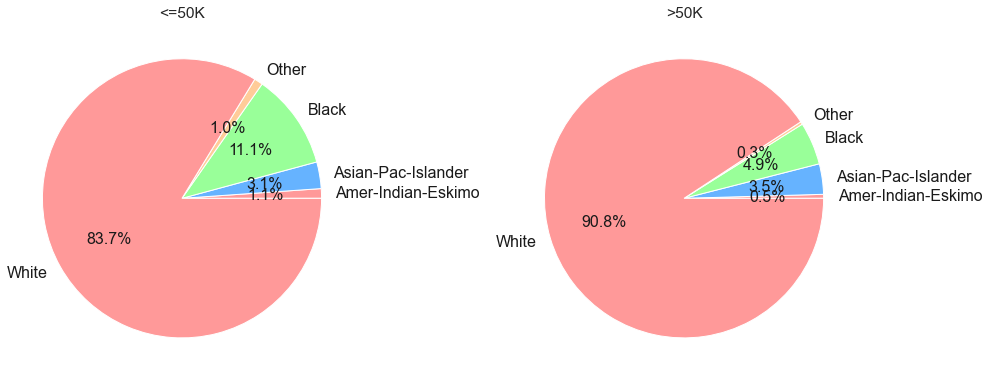

In [438]:
df_race_salary.plot.pie(
                    subplots=True, layout=(1,2),
                    legend=False,
                    colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'],
                    autopct='%.1f%%',
                    ylabel="",
                    title=["<=50K",">50K"],
                    textprops={'fontsize':16, 'color':'k'},
                    figsize=(14,8));
 
plt.tight_layout()

Irka göre yapılan incelemeler neticesinde,
1. Örneklemde en yüksek oran %85.6 ile beyazlar ve onları takiben %9.6 ile siyahlardadır.
2. Her bir grubun kendi içinde yapılan maaş bağlamındaki oranlama da, aynı ırk içinde en yüksek oranla 50k üstü kazanç sağlayanlar %26.6 ile Asian_Pac-Islanderlardır. Onları %25.6 ile beyazlar izlemektedir.
3. Maaş bağlamında yapılan inceleme neticesinde iki grupta da en yüksek oran örneklemin %85.6'sını kapsayan beyazlardadır. Irkın burada çok bağlayıcı bir engel teşkil ettiği söylenemez diyebiliriz.

# SEX

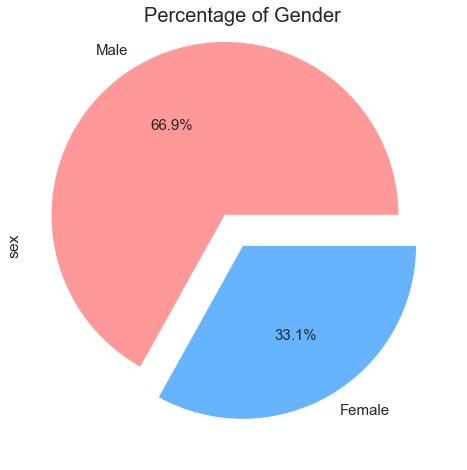

In [439]:
plt.figure(figsize=(12,8))
df.sex.value_counts().plot.pie(autopct="%.1f%%", fontsize=15, explode=[0.2,0],colors = ['#ff9999','#66b3ff']);
plt.title("Percentage of Gender", fontsize=20);

In [440]:
values_female = df.groupby("sex")["salary"].value_counts()["Female"]
values_Male = df.groupby("sex")["salary"].value_counts()["Male"]

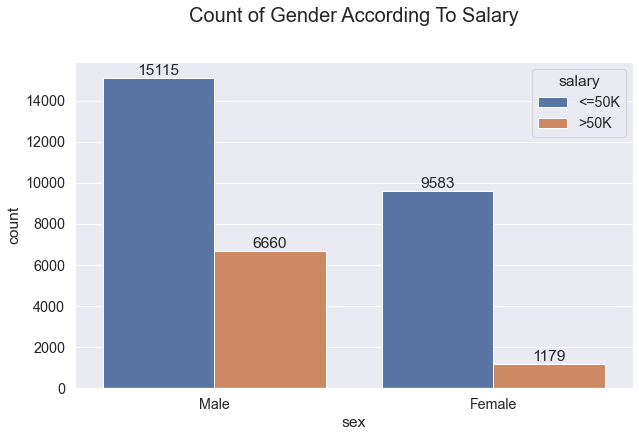

In [441]:
ax = sns.countplot(x="sex", hue="salary", data=df);
ax.set_title("Count of Gender According To Salary", size=20, pad=40)
for i in ax.containers:
    ax.bar_label(i);

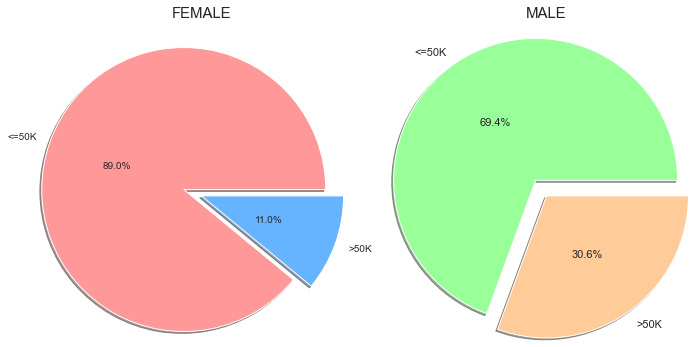

In [442]:
plt.subplot(121)
colors = ['#ff9999','#66b3ff']
plt.pie( x = values_female.values, labels=values_female.index, colors=colors, shadow=True, autopct="%.1f%%",
         pctdistance=0.5, textprops={'fontsize': 10}, radius=1.5, explode=[0.2,0]);
plt.title("FEMALE", pad=60, fontsize= 15)
plt.subplot(122)
colors = ['#99ff99','#ffcc99']
plt.pie( x = values_Male.values, labels=values_Male.index, colors=colors, shadow=True, autopct="%.1f%%",
         pctdistance=0.5, textprops={'fontsize': 11}, radius=1.5, explode=[0.2,0]);
plt.title("MALE", pad=60, fontsize= 15)
plt.tight_layout()

In [443]:
values_less = df.groupby("salary")["sex"].value_counts()["<=50K"]
values_more = df.groupby("salary")["sex"].value_counts()[">50K"]

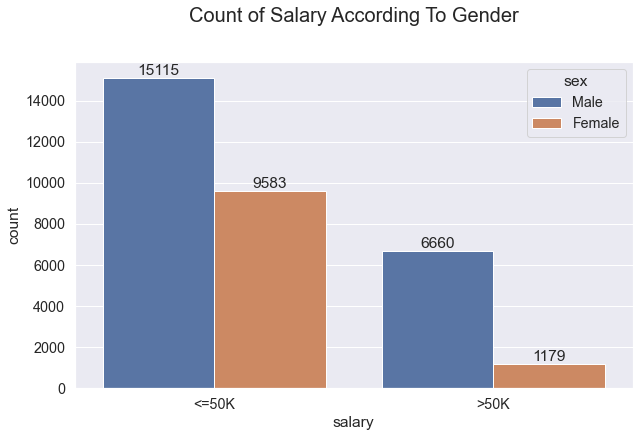

In [444]:
ax = sns.countplot(x="salary", hue="sex", data=df);
ax.set_title("Count of Salary According To Gender", size=20, pad=40)
for i in ax.containers:
    ax.bar_label(i);

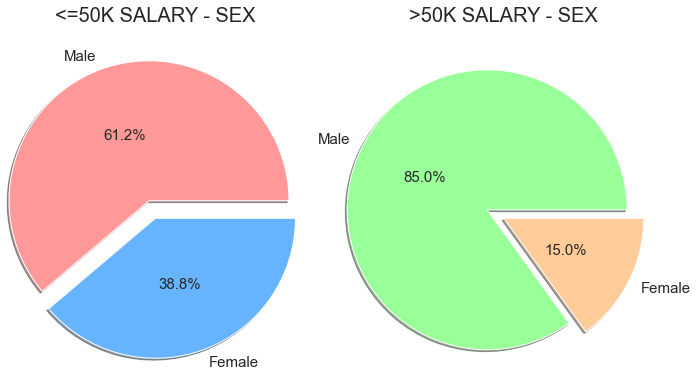

In [445]:
plt.subplot(121)
colors = ['#ff9999','#66b3ff']
plt.pie( x = values_less.values, labels=values_less.index, colors=colors, shadow=True, autopct="%.1f%%",
         pctdistance=0.5, textprops={'fontsize': 15}, radius=1.5, explode=[0.2,0]);
plt.title("<=50K SALARY - SEX", pad=80, fontsize= 20)
plt.subplot(122)
colors = ['#99ff99','#ffcc99']
plt.pie( x = values_more.values, labels=values_more.index, colors=colors, shadow=True, autopct="%.1f%%",
         pctdistance=0.5, textprops={'fontsize': 15}, radius=1.5, explode=[0.2,0]);
plt.title(">50K SALARY - SEX", pad=80, fontsize= 20)
plt.tight_layout()

Cinsiyet üzerinden yapılan kontroller neticesinde;
1. Örneklemin büyük çoğunluğunu %66.9 oran ile erkeklerin oluşturduğu görülmektedir.
2. Bayanların sadece %11'i 50k üstü kazanç sağlayabilirken, erkeklerin %30.6'sı 50k üstü kazanç sağlayabilmektedir. Cinsiyetler arasında belirgin bir oransal fark mevcuttur.
3. 50k altı maaşta; oranının çokluğunun da etksiyle %61.2 ile erkekler en fazla orana sahipken, 50k üstünde ise yine erkekler %85 oran ile belirgin şekilde daha fazla kazanç sağlamaktadırlar.

# COUNTRY

In [446]:
df.country.value_counts()

United-States                 29153
Mexico                          639
Other                           582
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Japan                            62
Guatemala                        62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

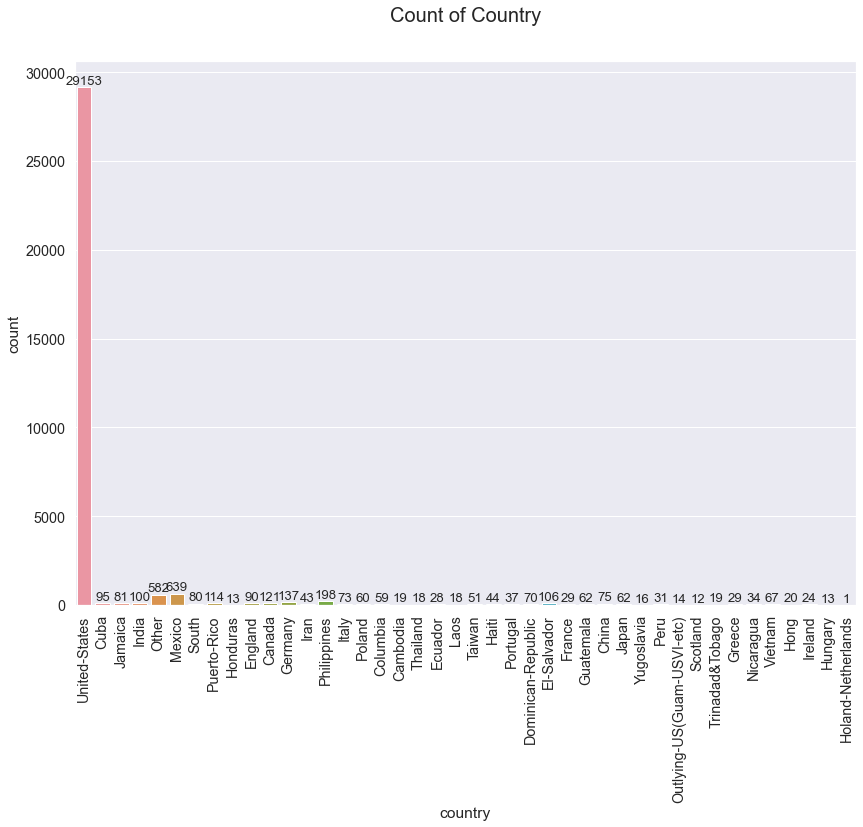

In [447]:
plt.figure(figsize=(14,10))
ax = sns.countplot(df.country)
sns.set(font_scale = 1.1)
plt.xticks(rotation=90)
ax.set_title("Count of Country", size=20, pad=40)
for i in ax.containers:
    ax.bar_label(i);


In [448]:
df["country_sum"] = df["country"].transform(lambda x: "USA" if x == "United-States" else "Other")
df["country_sum"].value_counts()

USA      29153
Other     3384
Name: country_sum, dtype: int64

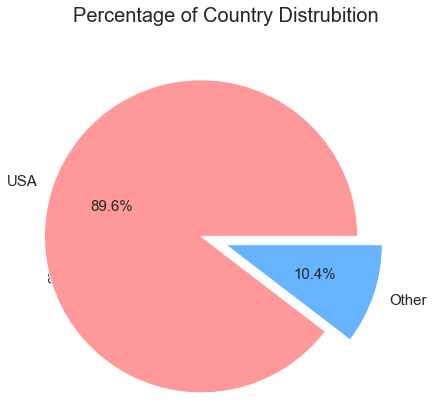

In [449]:
df.country_sum.value_counts().plot.pie(autopct="%.1f%%",radius=1.2, fontsize=15, colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99'], explode=[0.2,0]);
plt.title("Percentage of Country Distrubition", fontsize=20, pad=60);

In [450]:
values_us = df.groupby("country_sum")["salary"].value_counts()["USA"]
values_other = df.groupby("country_sum")["salary"].value_counts()["Other"]

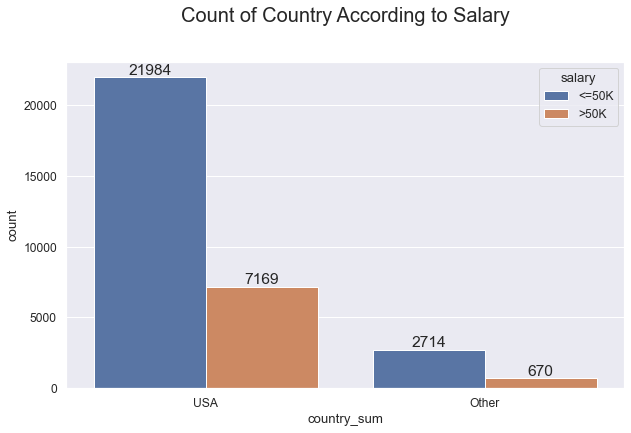

In [451]:
ax = sns.countplot(x="country_sum", hue="salary", data=df);
sns.set(font_scale = 1.3)
ax.set_title("Count of Country According to Salary", size=20, pad=40)
for i in ax.containers:
    ax.bar_label(i);

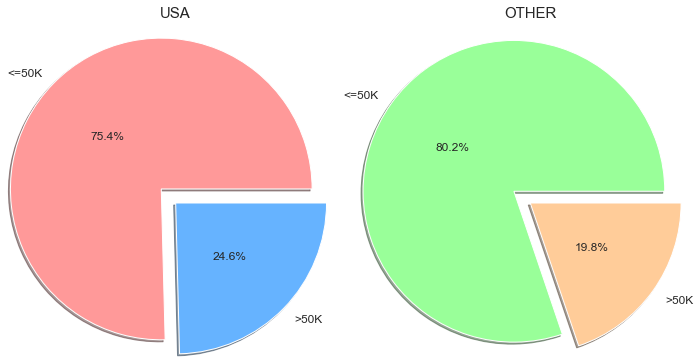

In [452]:
plt.subplot(121)
colors = ['#ff9999','#66b3ff']
plt.pie( x = values_us.values, labels=values_us.index, colors=colors, shadow=True, autopct="%.1f%%",
         pctdistance=0.5, textprops={'fontsize': 12}, radius=1.5, explode=[0.2,0]);
plt.title("USA", pad=60, fontsize= 15)
plt.subplot(122)
colors = ['#99ff99','#ffcc99']
plt.pie( x = values_other.values, labels=values_other.index, colors=colors, shadow=True, autopct="%.1f%%",
         pctdistance=0.5, textprops={'fontsize': 12}, radius=1.5, explode=[0.2,0]);
plt.title("OTHER", pad=60, fontsize= 15)
plt.tight_layout()

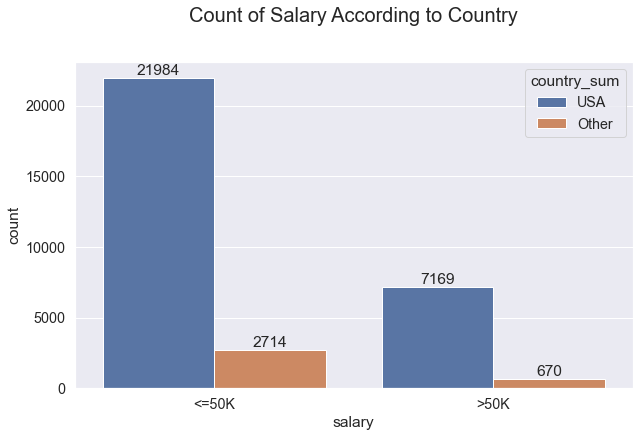

In [453]:
ax = sns.countplot(x="salary", hue="country_sum", data=df);
sns.set(font_scale = 1.3)
ax.set_title("Count of Salary According to Country", size=20, pad=40)
for i in ax.containers:
    ax.bar_label(i);

In [454]:
values_less = df.groupby("salary")["country_sum"].value_counts()["<=50K"]
values_more = df.groupby("salary")["country_sum"].value_counts()[">50K"]

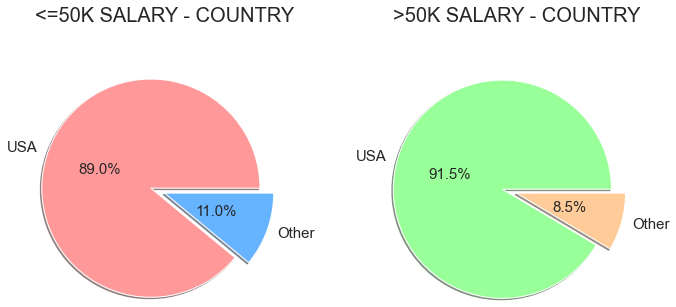

In [455]:
plt.subplot(121)
colors = ['#ff9999','#66b3ff']
plt.pie( x = values_less.values, labels=values_less.index, colors=colors, shadow=True, autopct="%.1f%%",
         pctdistance=0.5, textprops={'fontsize': 15}, radius=1.5, explode=[0.2,0]);
plt.title("<=50K SALARY - COUNTRY", pad=80, fontsize= 20)
plt.subplot(122)
colors = ['#99ff99','#ffcc99']
plt.pie( x = values_more.values, labels=values_more.index, colors=colors, shadow=True, autopct="%.1f%%",
         pctdistance=0.5, textprops={'fontsize': 15}, radius=1.5, explode=[0.2,0]);
plt.title(">50K SALARY - COUNTRY", pad=80, fontsize= 20)
plt.tight_layout()

Örneklemdeki kişilerin ülkelerine ait veriler incelendiğinde;
1. Çok fazla ülke grubu olması nedeniyle örneklem kolay incelenebilmesi adına USA ve Other olmak üzere 2 gruba bölünmüştür. Bu çerçevede %89.6'lık oranla USA örneklemdeki en fazla orana sahiptir.
2. USA ve otker olmak üzere 2 grubunda kendi içindeki oranlarına bakıldığında yıllık kazançta yaklaşık aynı skalada oldukları söyelenebilir.
3. Maaş bağlamında yapılan incelemede de 50k altı ve üstü yıllık kazançta USA ülkesinden olanlar en yüksek orana sahiptir ve bu verilerin maaş noktasında bağlayıcı çok bir etkisinin olduğunu söyleyemeyiz.

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Other Specific Analysis Questions</p>

<a id="5"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

### 1. What is the average age of males and females by income level?

In [456]:
df_mean = df.groupby(["salary","sex"])["age"].mean().to_frame().reset_index()
df_mean

salary     sex   age
0  <=50K  Female 36.22
1  <=50K    Male 37.15
2   >50K  Female 42.13
3   >50K    Male 44.63

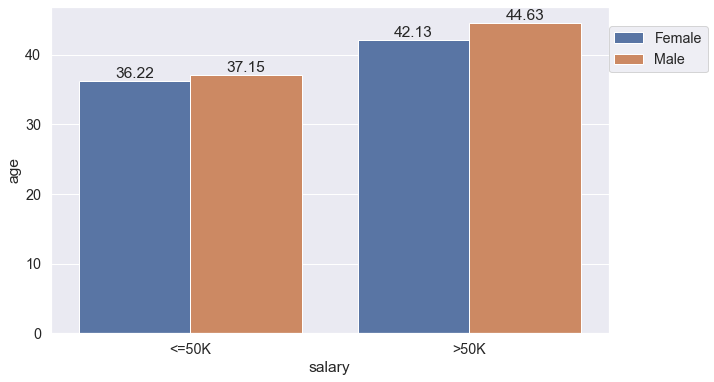

In [457]:
ax = sns.barplot( x= "salary", y="age", hue="sex", data=df_mean)
for i in ax.containers:
    ax.bar_label(i, fmt ='%0.2f')
plt.legend(loc=(1,0.8));

### 2. What is the workclass percentages of Americans in high-level income group?

In [458]:
df_average = (df[df["salary"] == ">50K"]["workclass"].value_counts(normalize=True)*100).to_frame().reset_index()
df_average

index  workclass
0           Private      63.29
1  Self-emp-not-inc       9.24
2      Self-emp-inc       7.93
3         Local-gov       7.87
4       Federal-gov       4.73
5         State-gov       4.50
6             Other       2.44

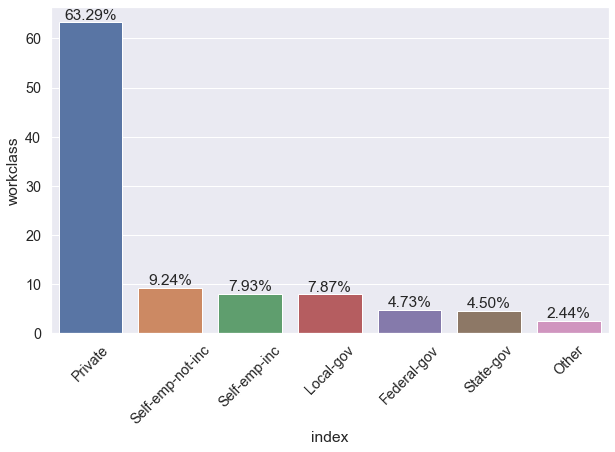

In [459]:
ax = sns.barplot(x="index", y="workclass", data=df_average)
for i in ax.containers:
    ax.bar_label(i,fmt ='%0.2f%%');
plt.xticks(rotation=45);

### 3. What is the occupation percentages of Americans who work as "Private" workclass in high-level income group?

In [460]:
df_occupation = (df[(df["workclass"] == "Private") & (df["salary"] == ">50K")]["occupation"].value_counts(normalize=True)*100).to_frame().reset_index()
df_occupation

index  occupation
0     Exec-managerial       26.10
1      Prof-specialty       20.30
2        Craft-repair       14.53
3               Sales       13.79
4        Adm-clerical        6.47
5    Transport-moving        5.12
6   Machine-op-inspct        4.52
7        Tech-support        4.45
8       Other-service        2.02
9   Handlers-cleaners        1.47
10    Farming-fishing        0.60
11    Protective-serv        0.60
12    Priv-house-serv        0.02

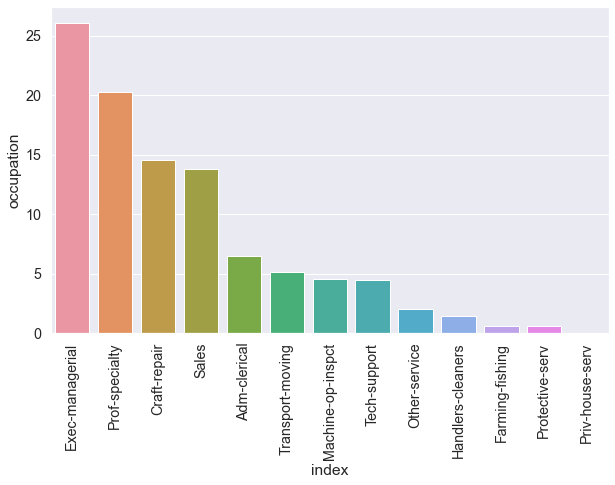

In [461]:
ax = sns.barplot(x="index", y="occupation", data=df_occupation)

plt.xticks(rotation=90);

### 4. What is the education level percentages of Asian-Pac-Islander race group in high-level income group?

In [462]:
df_edu = (df[(df["race"] == "Asian-Pac-Islander") & ((df["salary"] == ">50K"))]["education"].value_counts(normalize=True)*100).to_frame().reset_index()
df_edu

index  education
0      Bachelors      35.14
1        Masters      15.58
2        HS-grad      12.32
3   Some-college      11.96
4    Prof-school       9.78
5      Doctorate       6.52
6      Assoc-voc       3.26
7     Assoc-acdm       2.90
8        5th-6th       1.09
9            9th       0.36
10          11th       0.36
11          10th       0.36
12          12th       0.36

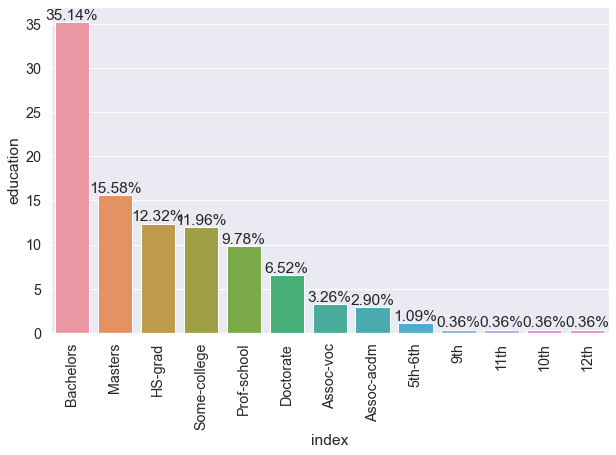

In [463]:
ax = sns.barplot(x="index", y="education", data=df_edu)
for i in ax.containers:
    ax.bar_label(i, fmt="%.2f%%");
plt.xticks(rotation=90);

### 5. What is the occupation percentages of Asian-Pac-Islander race group who has a Bachelors degree in high-level income group?

In [464]:
df_asian = (df[(df["race"] == "Asian-Pac-Islander") & (df["salary"] == ">50K") & (df["education"] == "Bachelors")]["occupation"].value_counts(normalize=True)*100).to_frame().reset_index()
df_asian

index  occupation
0     Exec-managerial       27.84
1      Prof-specialty       25.77
2        Adm-clerical       12.37
3               Sales        9.28
4       Other-service        9.28
5        Craft-repair        7.22
6        Tech-support        3.09
7     Protective-serv        2.06
8    Transport-moving        1.03
9   Machine-op-inspct        1.03
10    Farming-fishing        1.03

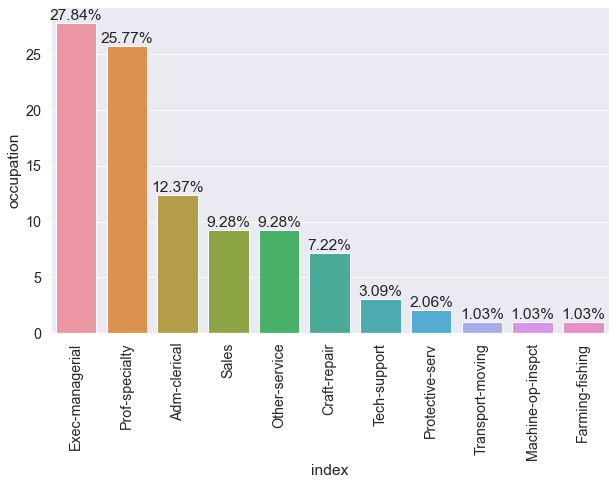

In [465]:
ax = sns.barplot(x="index", y="occupation", data=df_asian)
for i in ax.containers:
    ax.bar_label(i, fmt="%.2f%%");
plt.xticks(rotation=90);

### 6. What is the mean of working hours per week by gender for education level, workclass and marital status? Try to plot all required in one figure.

In [466]:
df.groupby(["sex","workclass_sum","marital_status","education_level"])["working_hours"].mean().to_frame().reset_index()

sex workclass_sum     marital_status education_level  working_hours
0    Female           Gov           Divorced            High          43.84
1    Female           Gov           Divorced             Low          38.80
2    Female           Gov           Divorced          Medium          43.06
3    Female           Gov           Divorced         Primary          37.29
4    Female           Gov  Married-AF-spouse             Low          39.33
..      ...           ...                ...             ...            ...
192    Male      Self_emp          Separated         Primary          37.50
193    Male      Self_emp            Widowed            High          34.00
194    Male      Self_emp            Widowed             Low          38.48
195    Male      Self_emp            Widowed          Medium          40.33
196    Male      Self_emp            Widowed         Primary          38.57

[197 rows x 5 columns]

<Figure size 1440x1152 with 0 Axes>

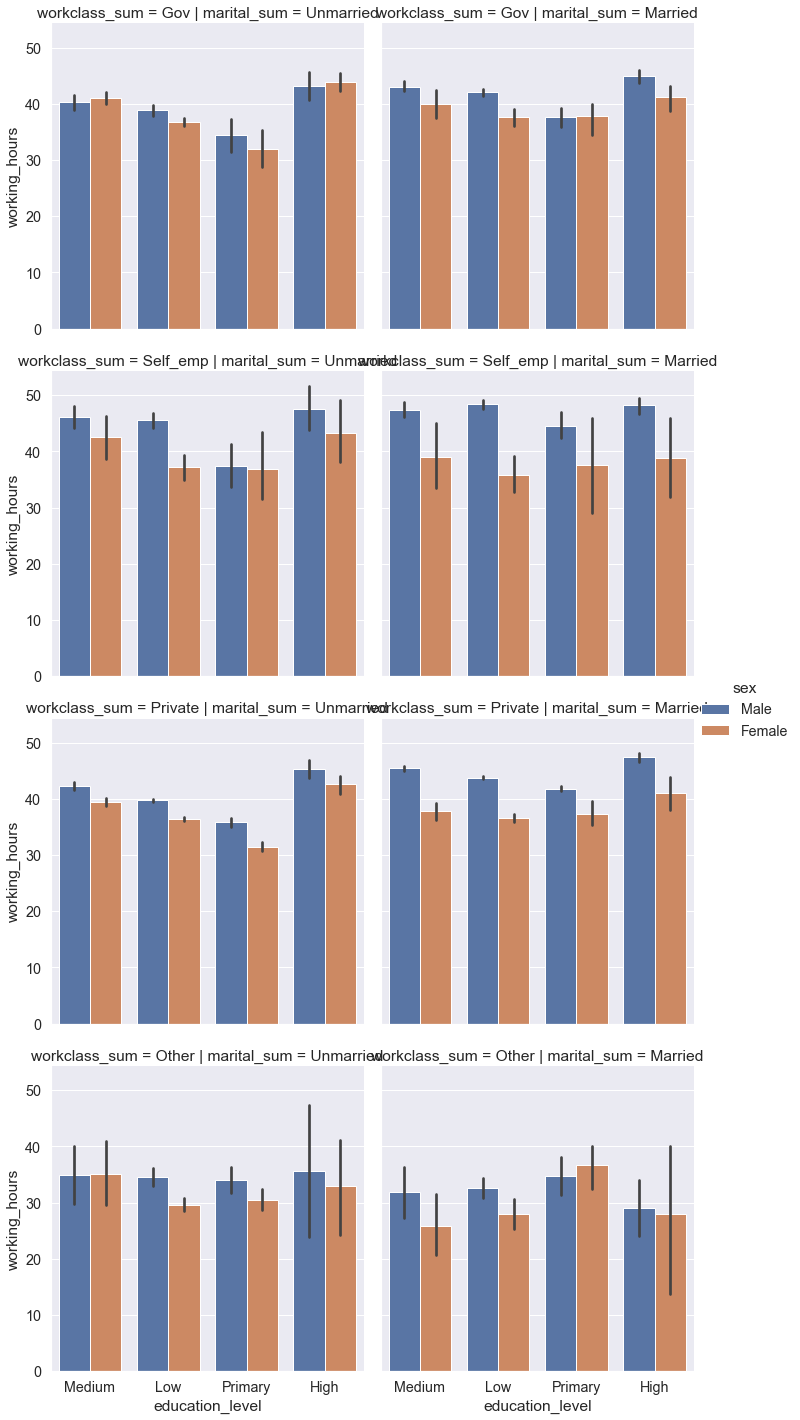

In [467]:
plt.figure(figsize=(20,16))
sns.catplot(x="education_level", y="working_hours",hue="sex", col="marital_sum", row="workclass_sum", data=df, kind="bar");

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Dropping Similar & Unneccessary Features</p>

<a id="6"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

In [468]:
df.head()

age         workclass  fnlwgt  education  education_num  \
0   39         State-gov   77516  Bachelors          13.00   
1   50  Self-emp-not-inc   83311  Bachelors          13.00   
2   38           Private  215646    HS-grad           9.00   
3   53           Private  234721       11th           7.00   
4   28           Private  338409  Bachelors          13.00   

       marital_status         occupation   relationship   race     sex  Cgain  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   2174   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male      0   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male      0   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male      0   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female      0   

   Closs  working_hours        country salary education_level workclass_sum  \
0      0             40  United-States  <=50K          Medium           Gov   
1      0             13  United-States  <=50K          Medium      Self_emp   
2      0             40  United-States  <=50K             Low       Private   
3      0             40  United-States  <=50K         Primary       Private   
4      0             40           Cuba  <=50K          Medium       Private   

  marital_sum country_sum  
0   Unmarried         USA  
1     Married         USA  
2   Unmarried         USA  
3     Married         USA  
4     Married       Other

In [469]:
df_cleaned = df.drop(columns=["workclass","education","education_num","marital_status","relationship","country"])
df_cleaned.shape

(32537, 13)

In [470]:
df_cleaned.head()

age  fnlwgt         occupation   race     sex  Cgain  Closs  working_hours  \
0   39   77516       Adm-clerical  White    Male   2174      0             40   
1   50   83311    Exec-managerial  White    Male      0      0             13   
2   38  215646  Handlers-cleaners  White    Male      0      0             40   
3   53  234721  Handlers-cleaners  Black    Male      0      0             40   
4   28  338409     Prof-specialty  Black  Female      0      0             40   

  salary education_level workclass_sum marital_sum country_sum  
0  <=50K          Medium           Gov   Unmarried         USA  
1  <=50K          Medium      Self_emp     Married         USA  
2  <=50K             Low       Private   Unmarried         USA  
3  <=50K         Primary       Private     Married         USA  
4  <=50K          Medium       Private     Married       Other

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Handling with Outliers</p>

<a id="8"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

**Result :** As we see, there are number of extreme values in both "age and hours_per_week" features. But how can we know if these extreme values are outliers or not? At this point, **domain knowledge** comes to the fore.

**Domain Knowledge for this dataset:**
1. In this dataset, all values are created according to the statements of individuals. So It can be some "data entries errors".
2. In addition, we have aimed to create an ML model with some restrictions as getting better performance from the ML model.
3. In this respect, our sample space ranges for some features are as follows.
    - **age : 17 to 80**
    - **hours_per_week : 7 to 70**
    - **if somebody's age is more than 60, he/she can't work more than 60 hours in a week**

In [471]:
df_cleaned = df_cleaned[(df_cleaned["age"]<80) & (df_cleaned["age"]>17)]
df_cleaned = df_cleaned[(df_cleaned["working_hours"]<70) & (df_cleaned["working_hours"]>7)]
df_cleaned = df_cleaned[~((df_cleaned["age"]>=60) & (df_cleaned["working_hours"]>=60))]

df_cleaned.sample(10)

age  fnlwgt        occupation                race     sex  Cgain  \
7423    37   99146   Exec-managerial               White    Male      0   
3985    20  122215     Other-service               Black    Male      0   
2653    19  115248      Adm-clerical  Asian-Pac-Islander    Male      0   
17508   43  131899   Exec-managerial               White    Male      0   
17413   28   22422  Transport-moving               White    Male      0   
22019   20   47678      Craft-repair               White    Male      0   
19595   51   87205      Adm-clerical               White  Female   7688   
26487   46   59287      Craft-repair               White    Male      0   
10313   64  173754      Adm-clerical               White    Male      0   
14894   50  129673   Exec-managerial               White  Female      0   

       Closs  working_hours salary education_level workclass_sum marital_sum  \
7423    1977             50   >50K          Medium       Private     Married   
3985       0             52  <=50K             Low       Private   Unmarried   
2653       0             40  <=50K             Low       Private   Unmarried   
17508      0             40   >50K          Medium       Private     Married   
17413      0             55  <=50K             Low       Private   Unmarried   
22019      0             40  <=50K             Low       Private   Unmarried   
19595      0             20   >50K          Medium       Private     Married   
26487      0             40  <=50K             Low       Private     Married   
10313      0             40  <=50K             Low           Gov     Married   
14894      0             50   >50K          Medium       Private   Unmarried   

      country_sum  
7423          USA  
3985          USA  
2653        Other  
17508         USA  
17413         USA  
22019         USA  
19595         USA  
26487         USA  
10313         USA  
14894         USA

In [472]:
df_cleaned.shape

(30892, 13)

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Final Step to Make the Dataset Ready for ML Models</p>

<a id="9"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

### 1. Convert all features to numeric

In [473]:
df_cleaned.head()

age  fnlwgt         occupation   race     sex  Cgain  Closs  working_hours  \
0   39   77516       Adm-clerical  White    Male   2174      0             40   
1   50   83311    Exec-managerial  White    Male      0      0             13   
2   38  215646  Handlers-cleaners  White    Male      0      0             40   
3   53  234721  Handlers-cleaners  Black    Male      0      0             40   
4   28  338409     Prof-specialty  Black  Female      0      0             40   

  salary education_level workclass_sum marital_sum country_sum  
0  <=50K          Medium           Gov   Unmarried         USA  
1  <=50K          Medium      Self_emp     Married         USA  
2  <=50K             Low       Private   Unmarried         USA  
3  <=50K         Primary       Private     Married         USA  
4  <=50K          Medium       Private     Married       Other

In [474]:
df_cleaned.columns=["Age","FNLWGT","Occupation","Race","Sex","Capital_Gain","Capital_Loss","Working_Hours","Salary","Education_Level","Workclass_Level","Marital_Level","Country"]
df_cleaned.head(10)

Age  FNLWGT         Occupation   Race     Sex  Capital_Gain  Capital_Loss  \
0   39   77516       Adm-clerical  White    Male          2174             0   
1   50   83311    Exec-managerial  White    Male             0             0   
2   38  215646  Handlers-cleaners  White    Male             0             0   
3   53  234721  Handlers-cleaners  Black    Male             0             0   
4   28  338409     Prof-specialty  Black  Female             0             0   
5   37  284582    Exec-managerial  White  Female             0             0   
6   49  160187      Other-service  Black  Female             0             0   
7   52  209642    Exec-managerial  White    Male             0             0   
8   31   45781     Prof-specialty  White  Female         14084             0   
9   42  159449    Exec-managerial  White    Male          5178             0   

   Working_Hours Salary Education_Level Workclass_Level Marital_Level Country  
0             40  <=50K          Medium             Gov     Unmarried     USA  
1             13  <=50K          Medium        Self_emp       Married     USA  
2             40  <=50K             Low         Private     Unmarried     USA  
3             40  <=50K         Primary         Private       Married     USA  
4             40  <=50K          Medium         Private       Married   Other  
5             40  <=50K            High         Private       Married     USA  
6             16  <=50K         Primary         Private     Unmarried   Other  
7             45   >50K             Low        Self_emp       Married     USA  
8             50   >50K            High         Private     Unmarried     USA  
9             40   >50K          Medium         Private       Married     USA

In [475]:
df_cleaned["Salary"] = df_cleaned["Salary"].transform(lambda x: 1 if x == ">50K" else 0)
df_cleaned.head(10)

Age  FNLWGT         Occupation   Race     Sex  Capital_Gain  Capital_Loss  \
0   39   77516       Adm-clerical  White    Male          2174             0   
1   50   83311    Exec-managerial  White    Male             0             0   
2   38  215646  Handlers-cleaners  White    Male             0             0   
3   53  234721  Handlers-cleaners  Black    Male             0             0   
4   28  338409     Prof-specialty  Black  Female             0             0   
5   37  284582    Exec-managerial  White  Female             0             0   
6   49  160187      Other-service  Black  Female             0             0   
7   52  209642    Exec-managerial  White    Male             0             0   
8   31   45781     Prof-specialty  White  Female         14084             0   
9   42  159449    Exec-managerial  White    Male          5178             0   

   Working_Hours  Salary Education_Level Workclass_Level Marital_Level Country  
0             40       0          Medium             Gov     Unmarried     USA  
1             13       0          Medium        Self_emp       Married     USA  
2             40       0             Low         Private     Unmarried     USA  
3             40       0         Primary         Private       Married     USA  
4             40       0          Medium         Private       Married   Other  
5             40       0            High         Private       Married     USA  
6             16       0         Primary         Private     Unmarried   Other  
7             45       1             Low        Self_emp       Married     USA  
8             50       1            High         Private     Unmarried     USA  
9             40       1          Medium         Private       Married     USA

In [476]:
df_cleaned = pd.get_dummies(df_cleaned, drop_first=True)
df_cleaned.head()

Age  FNLWGT  Capital_Gain  Capital_Loss  Working_Hours  Salary  \
0   39   77516          2174             0             40       0   
1   50   83311             0             0             13       0   
2   38  215646             0             0             40       0   
3   53  234721             0             0             40       0   
4   28  338409             0             0             40       0   

   Occupation_Armed-Forces  Occupation_Craft-repair  \
0                        0                        0   
1                        0                        0   
2                        0                        0   
3                        0                        0   
4                        0                        0   

   Occupation_Exec-managerial  Occupation_Farming-fishing  \
0                           0                           0   
1                           1                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   Occupation_Handlers-cleaners  Occupation_Machine-op-inspct  \
0                             0                             0   
1                             0                             0   
2                             1                             0   
3                             1                             0   
4                             0                             0   

   Occupation_Other  Occupation_Other-service  Occupation_Priv-house-serv  \
0                 0                         0                           0   
1                 0                         0                           0   
2                 0                         0                           0   
3                 0                         0                           0   
4                 0                         0                           0   

   Occupation_Prof-specialty  Occupation_Protective-serv  Occupation_Sales  \
0                          0                           0                 0   
1                          0                           0                 0   
2                          0                           0                 0   
3                          0                           0                 0   
4                          1                           0                 0   

   Occupation_Tech-support  Occupation_Transport-moving  \
0                        0                            0   
1                        0                            0   
2                        0                            0   
3                        0                            0   
4                        0                            0   

   Race_Asian-Pac-Islander  Race_Black  Race_Other  Race_White  Sex_Male  \
0                        0           0           0           1         1   
1                        0           0           0           1         1   
2                        0           0           0           1         1   
3                        0           1           0           0         1   
4                        0           1           0           0         0   

   Education_Level_Low  Education_Level_Medium  Education_Level_Primary  \
0                    0                       1                        0   
1                    0                       1                        0   
2                    1                       0                        0   
3                    0                       0                        1   
4                    0                       1                        0   

   Workclass_Level_Other  Workclass_Level_Private  Workclass_Level_Self_emp  \
0                      0                        0                         0   
1                      0                        0                         1   
2                      0                        1                  

In [477]:
df_cleaned.shape

(30892, 33)

### 2. Take a look at correlation between features by utilizing power of visualizing

In [478]:
df_cleaned.corr()

Age  FNLWGT  Capital_Gain  Capital_Loss  \
Age                           1.00   -0.08          0.08          0.05   
FNLWGT                       -0.08    1.00         -0.00         -0.01   
Capital_Gain                  0.08   -0.00          1.00         -0.03   
Capital_Loss                  0.05   -0.01         -0.03          1.00   
Working_Hours                 0.07   -0.01          0.08          0.06   
Salary                        0.24   -0.01          0.22          0.15   
Occupation_Armed-Forces      -0.01    0.00         -0.00          0.01   
Occupation_Craft-repair       0.02    0.01         -0.02          0.00   
Occupation_Exec-managerial    0.10   -0.02          0.06          0.05   
Occupation_Farming-fishing    0.03   -0.02         -0.01         -0.01   
Occupation_Handlers-cleaners -0.09    0.03         -0.02         -0.02   
Occupation_Machine-op-inspct -0.02    0.01         -0.03         -0.02   
Occupation_Other              0.03   -0.00         -0.01         -0.01   
Occupation_Other-service     -0.08   -0.00         -0.04         -0.04   
Occupation_Priv-house-serv    0.02    0.01         -0.01         -0.01   
Occupation_Prof-specialty     0.05   -0.02          0.08          0.05   
Occupation_Protective-serv    0.00    0.02         -0.01         -0.00   
Occupation_Sales             -0.03    0.00          0.01          0.01   
Occupation_Tech-support      -0.02    0.00         -0.01          0.00   
Occupation_Transport-moving   0.03    0.00         -0.02         -0.00   
Race_Asian-Pac-Islander      -0.02   -0.05          0.01          0.01   
Race_Black                   -0.02    0.12         -0.02         -0.02   
Race_Other                   -0.03    0.01         -0.01         -0.01   
Race_White                    0.03   -0.06          0.01          0.02   
Sex_Male                      0.09    0.03          0.05          0.05   
Education_Level_Low          -0.11   -0.01         -0.08         -0.05   
Education_Level_Medium        0.00   -0.01          0.04          0.03   
Education_Level_Primary       0.04    0.05         -0.04         -0.03   
Workclass_Level_Other         0.03   -0.00         -0.01         -0.01   
Workclass_Level_Private      -0.19    0.04         -0.03         -0.03   
Workclass_Level_Self_emp      0.17   -0.04          0.08          0.04   
Marital_Level_Unmarried      -0.31    0.02         -0.08         -0.08   
Country_USA                   0.02   -0.07          0.00          0.01   

                              Working_Hours  Salary  Occupation_Armed-Forces  \
Age                                    0.07    0.24                    -0.01   
FNLWGT                                -0.01   -0.01                     0.00   
Capital_Gain                           0.08    0.22                    -0.00   
Capital_Loss                           0.06    0.15                     0.01   
Working_Hours                          1.00    0.24                     0.00   
Salary                                 0.24    1.00                    -0.01   
Occupation_Armed-Forces                0.00   -0.01                     1.00   
Occupation_Craft-repair                0.07   -0.01                    -0.01   
Occupation_Exec-managerial             0.16    0.22                    -0.01   
Occupation_Farming-fishing             0.04   -0.05                    -0.00   
Occupation_Handlers-cleaners          -0.04   -0.09                    -0.00   
Occupation_Machine-op-inspct           0.01   -0.07                    -0.00   
Occupation_Other                      -0.16   -0.08                    -0.00   
Occupation_Other-service              -0.18   -0.15                    -0.01   
Occupation_Priv-house-serv            -0.05   -0.04                    -0.00   
Occupation_Prof-specialty              0.06    0.19                    -0.01   
Occupation_Protective-serv             0.02    0.03                    -0.00   
Occupation_Sales                       0.03    0.02                    -0.

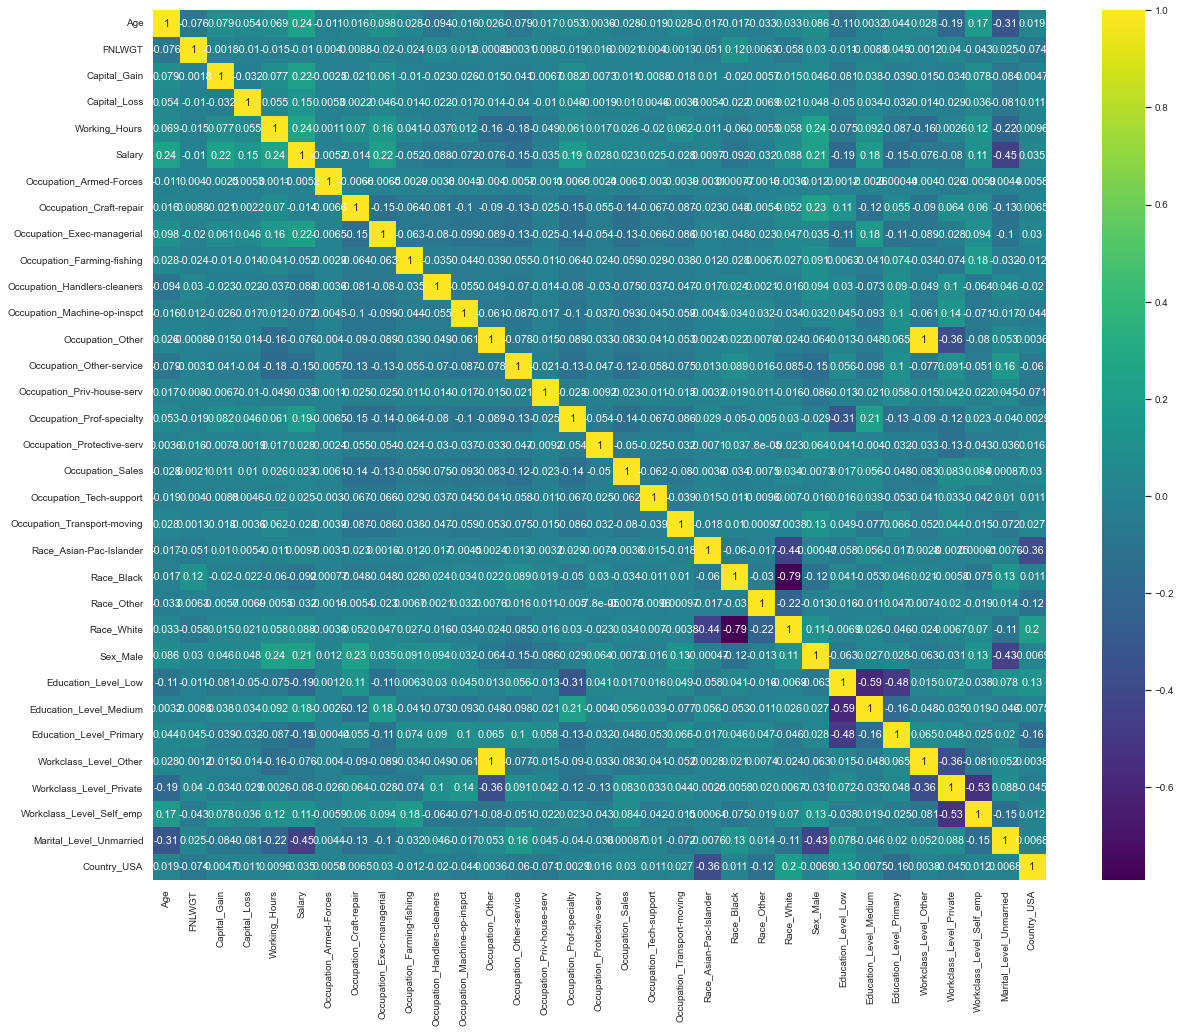

In [487]:
plt.figure(figsize=(20,16))
sns.set(font_scale = 0.9)

sns.heatmap(df_cleaned.corr(), annot=True, cmap="viridis");

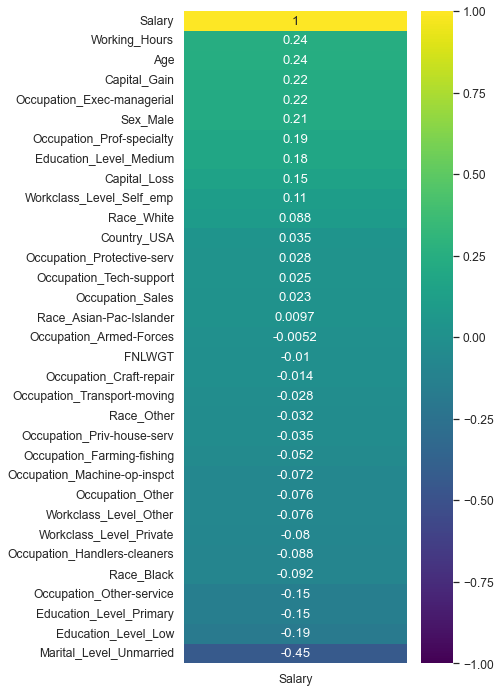

In [483]:
plt.figure(figsize=(5,12))
sns.heatmap(df_cleaned.corr()[["Salary"]].sort_values(ascending=False, by="Salary"), 
            annot=True, cmap="viridis",
           vmin= -1, vmax= 1);

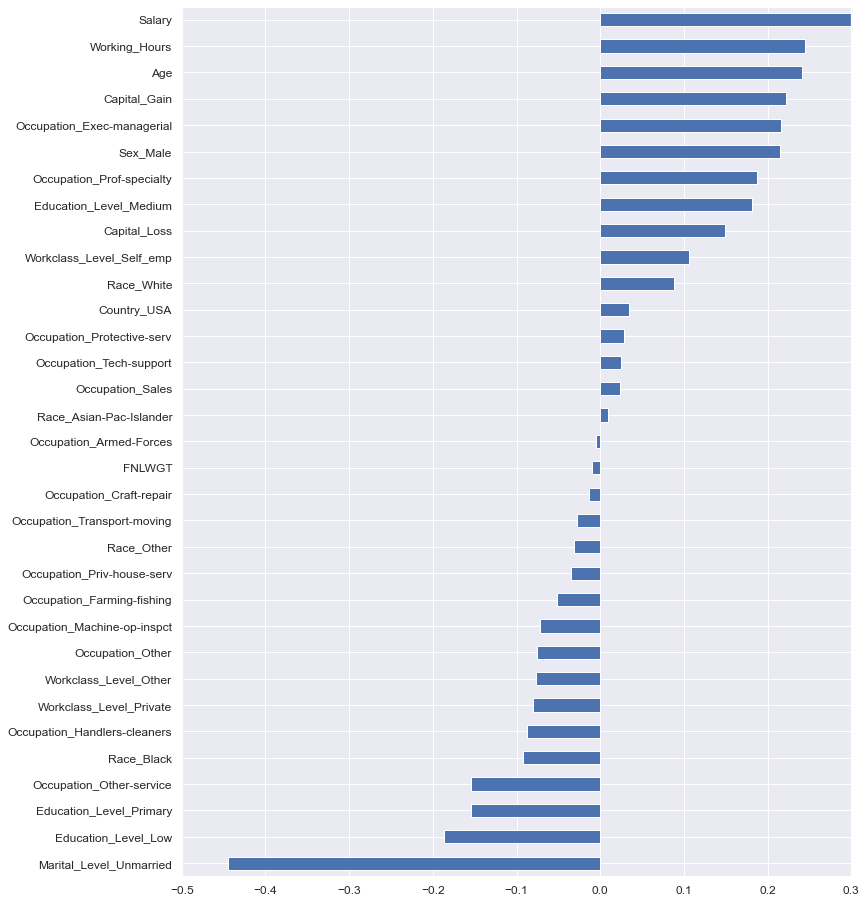

In [481]:
plt.figure(figsize=(12,16))
df_cleaned.corr()["Salary"].sort_values().plot(kind="barh",xlim=[-0.5,0.3], fontsize=12);